# Import

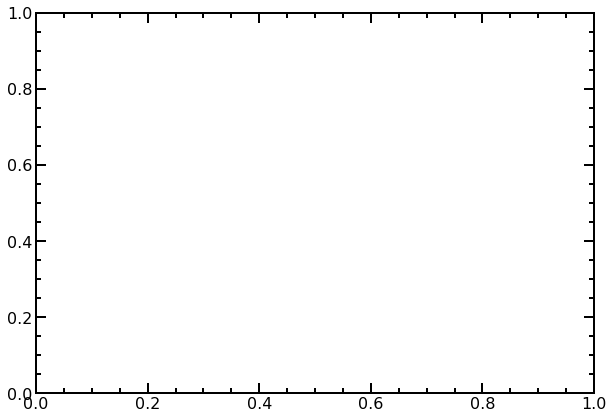

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import scipy.linalg
from qutip.qip.operations import*

## I JUST WANT TO DRAW A PULSE HERE

(-110.0, 110.0, -1.059530064845351, 1.098072860230731)

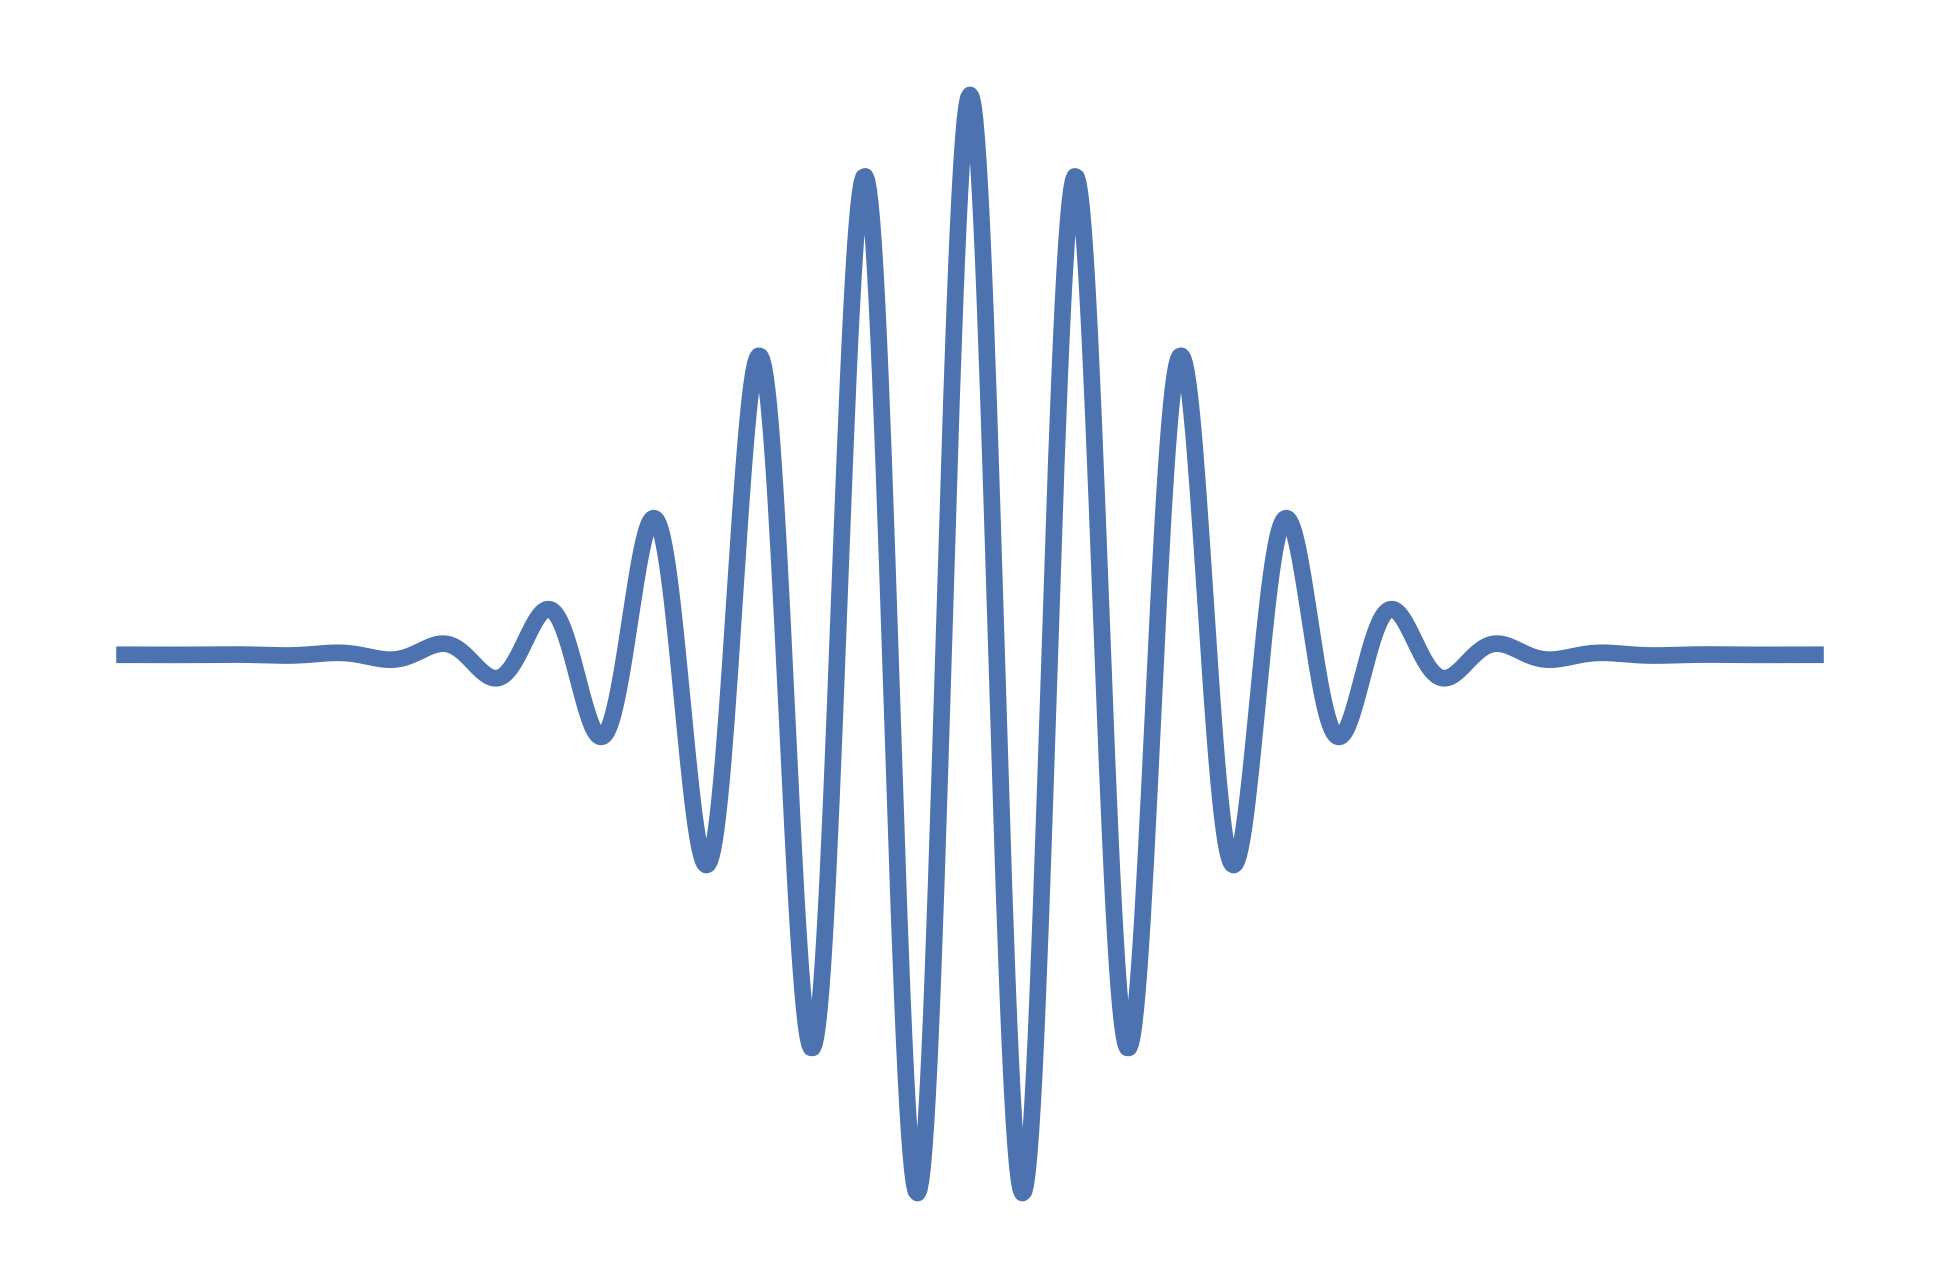

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
x = np.linspace(-100,100,1001)
y = np.exp(-x**2/1000)*np.cos(x/2)
plt.plot(x,y)
plt.axis('off')

# figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/SCQ summary/'
# plt.savefig(figpath + 'pulse.eps')

# State tomography

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.40909091+0.j         0.27272727-0.40909091j]
 [0.27272727+0.40909091j 0.59090909+0.j        ]]


<Figure size 2800x2800 with 0 Axes>

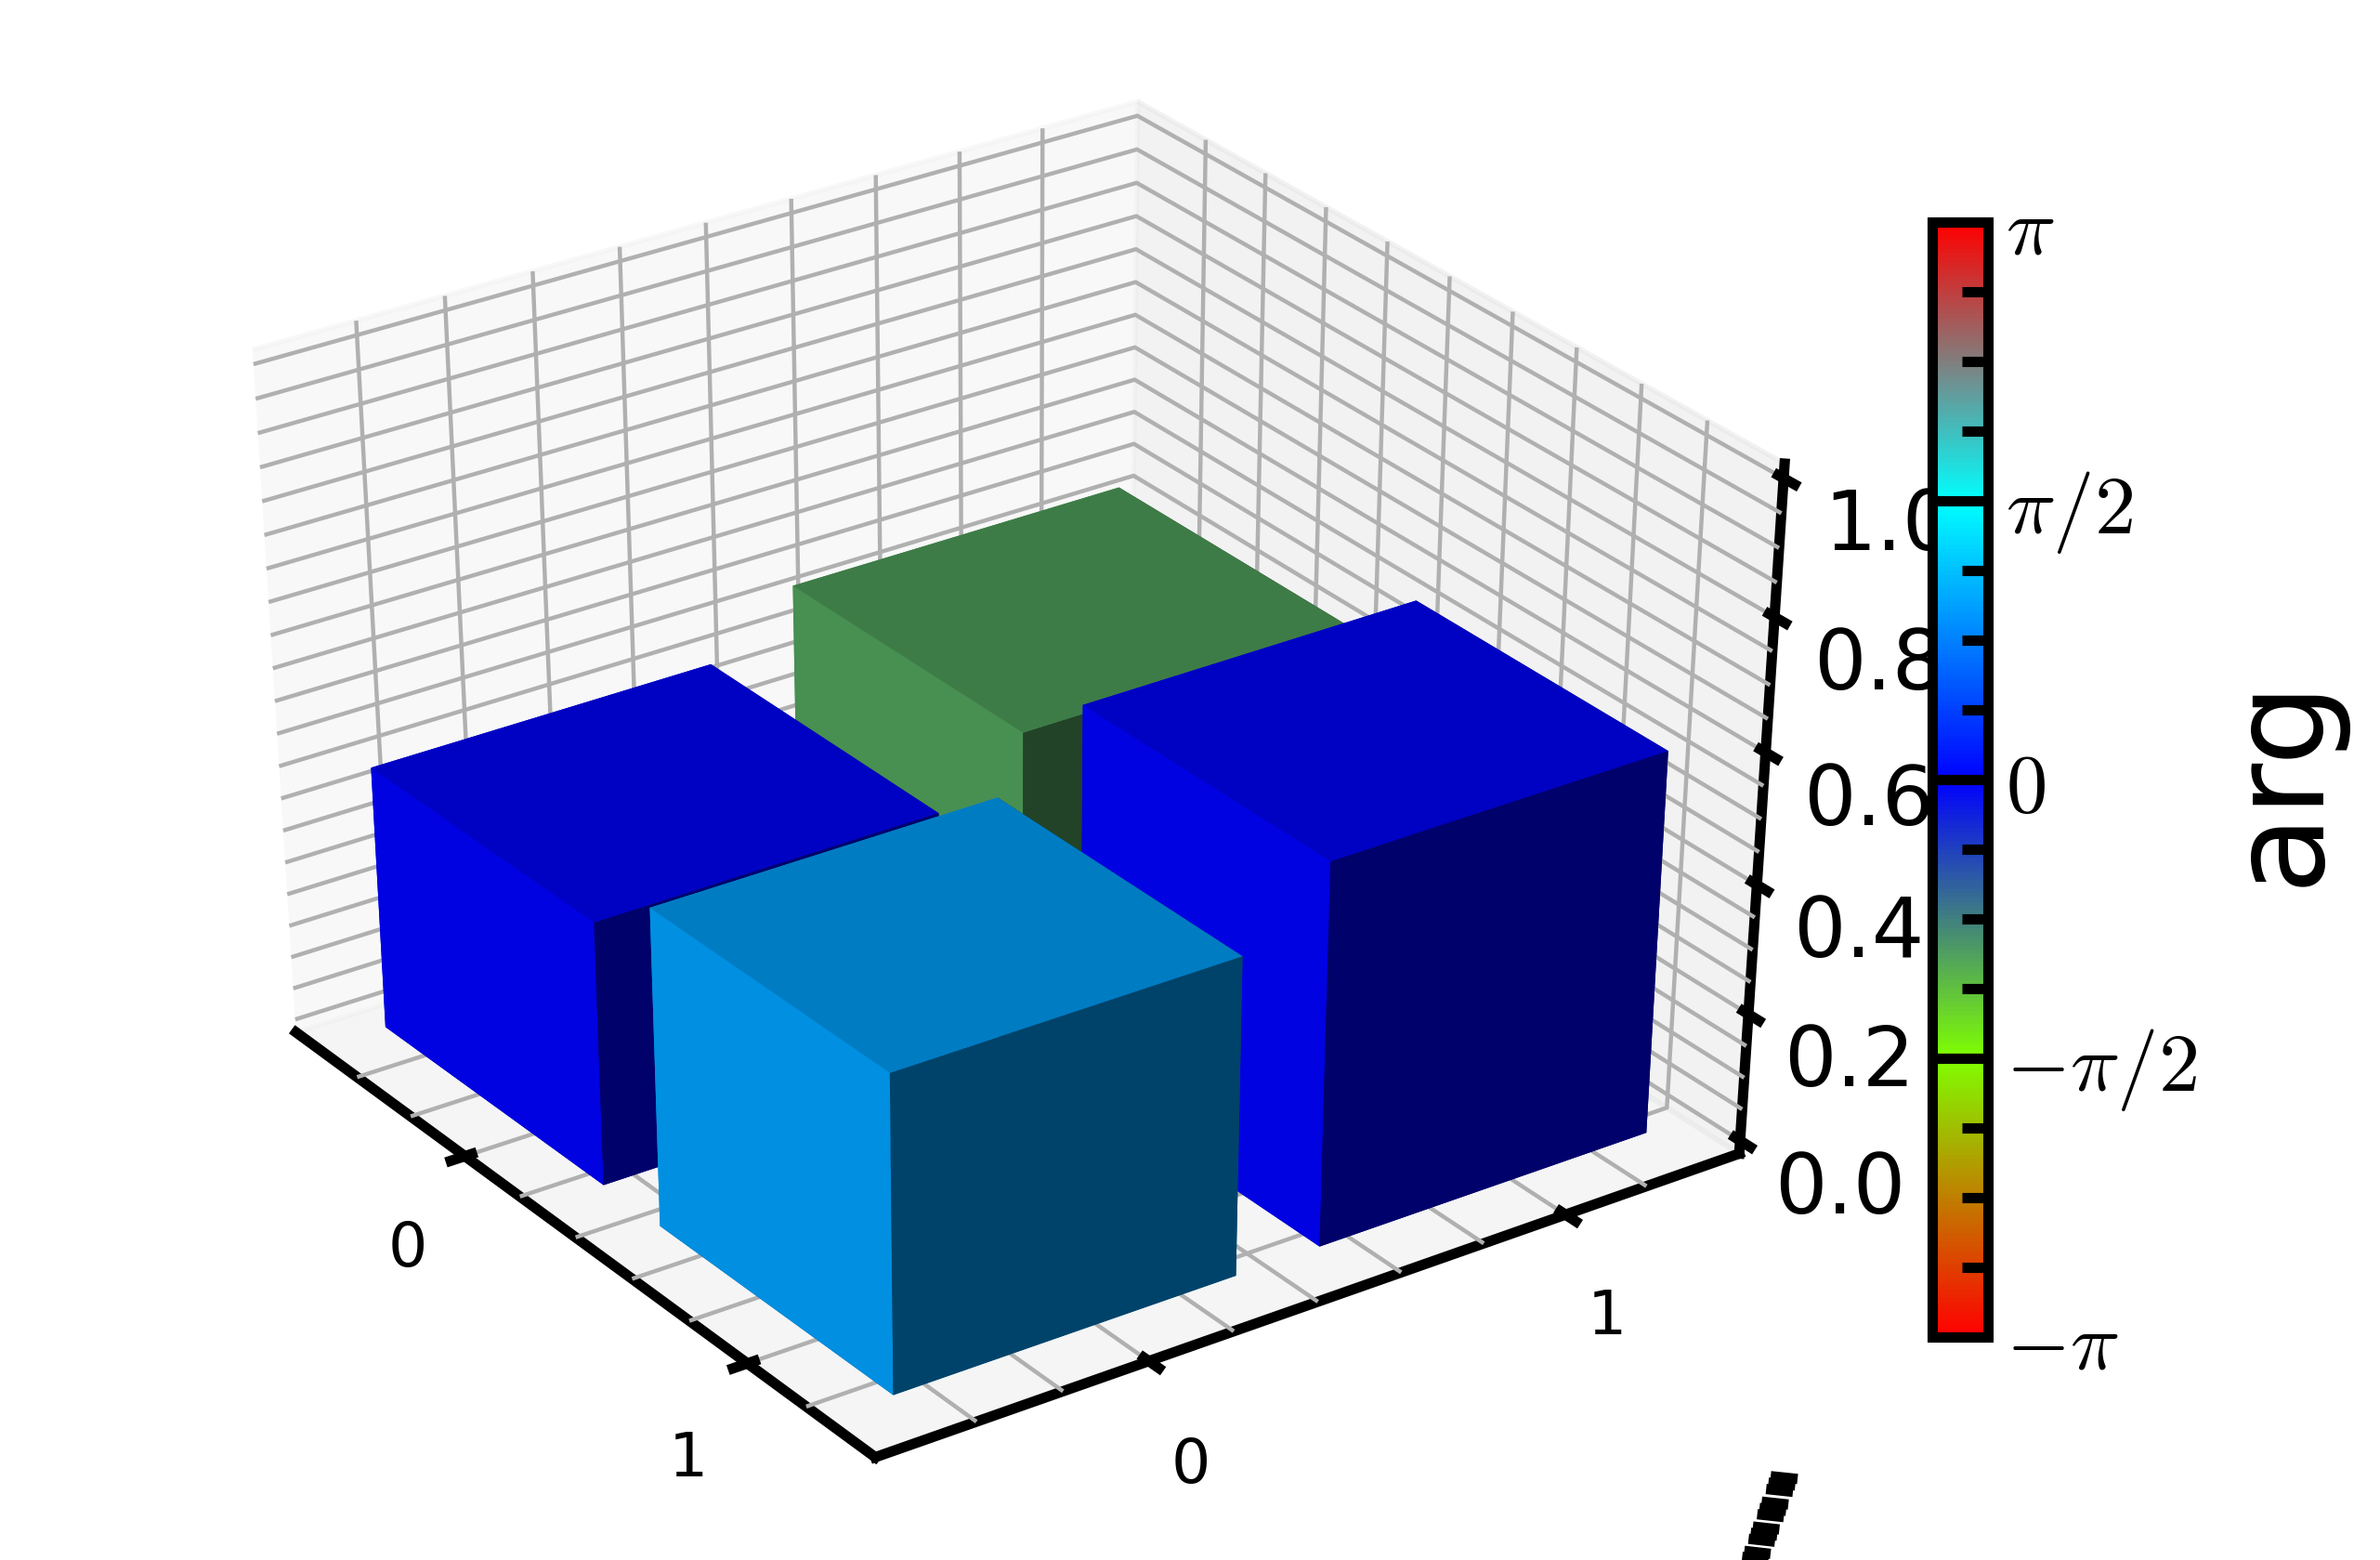

In [3]:
#State tomography
plt.figure(figsize=[7,7])
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
rho = ket2dm(psi)
matrix_histogram_complex(rho)
print (rho)

(<Figure size 2400x1600 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fbd6ba8f850>)

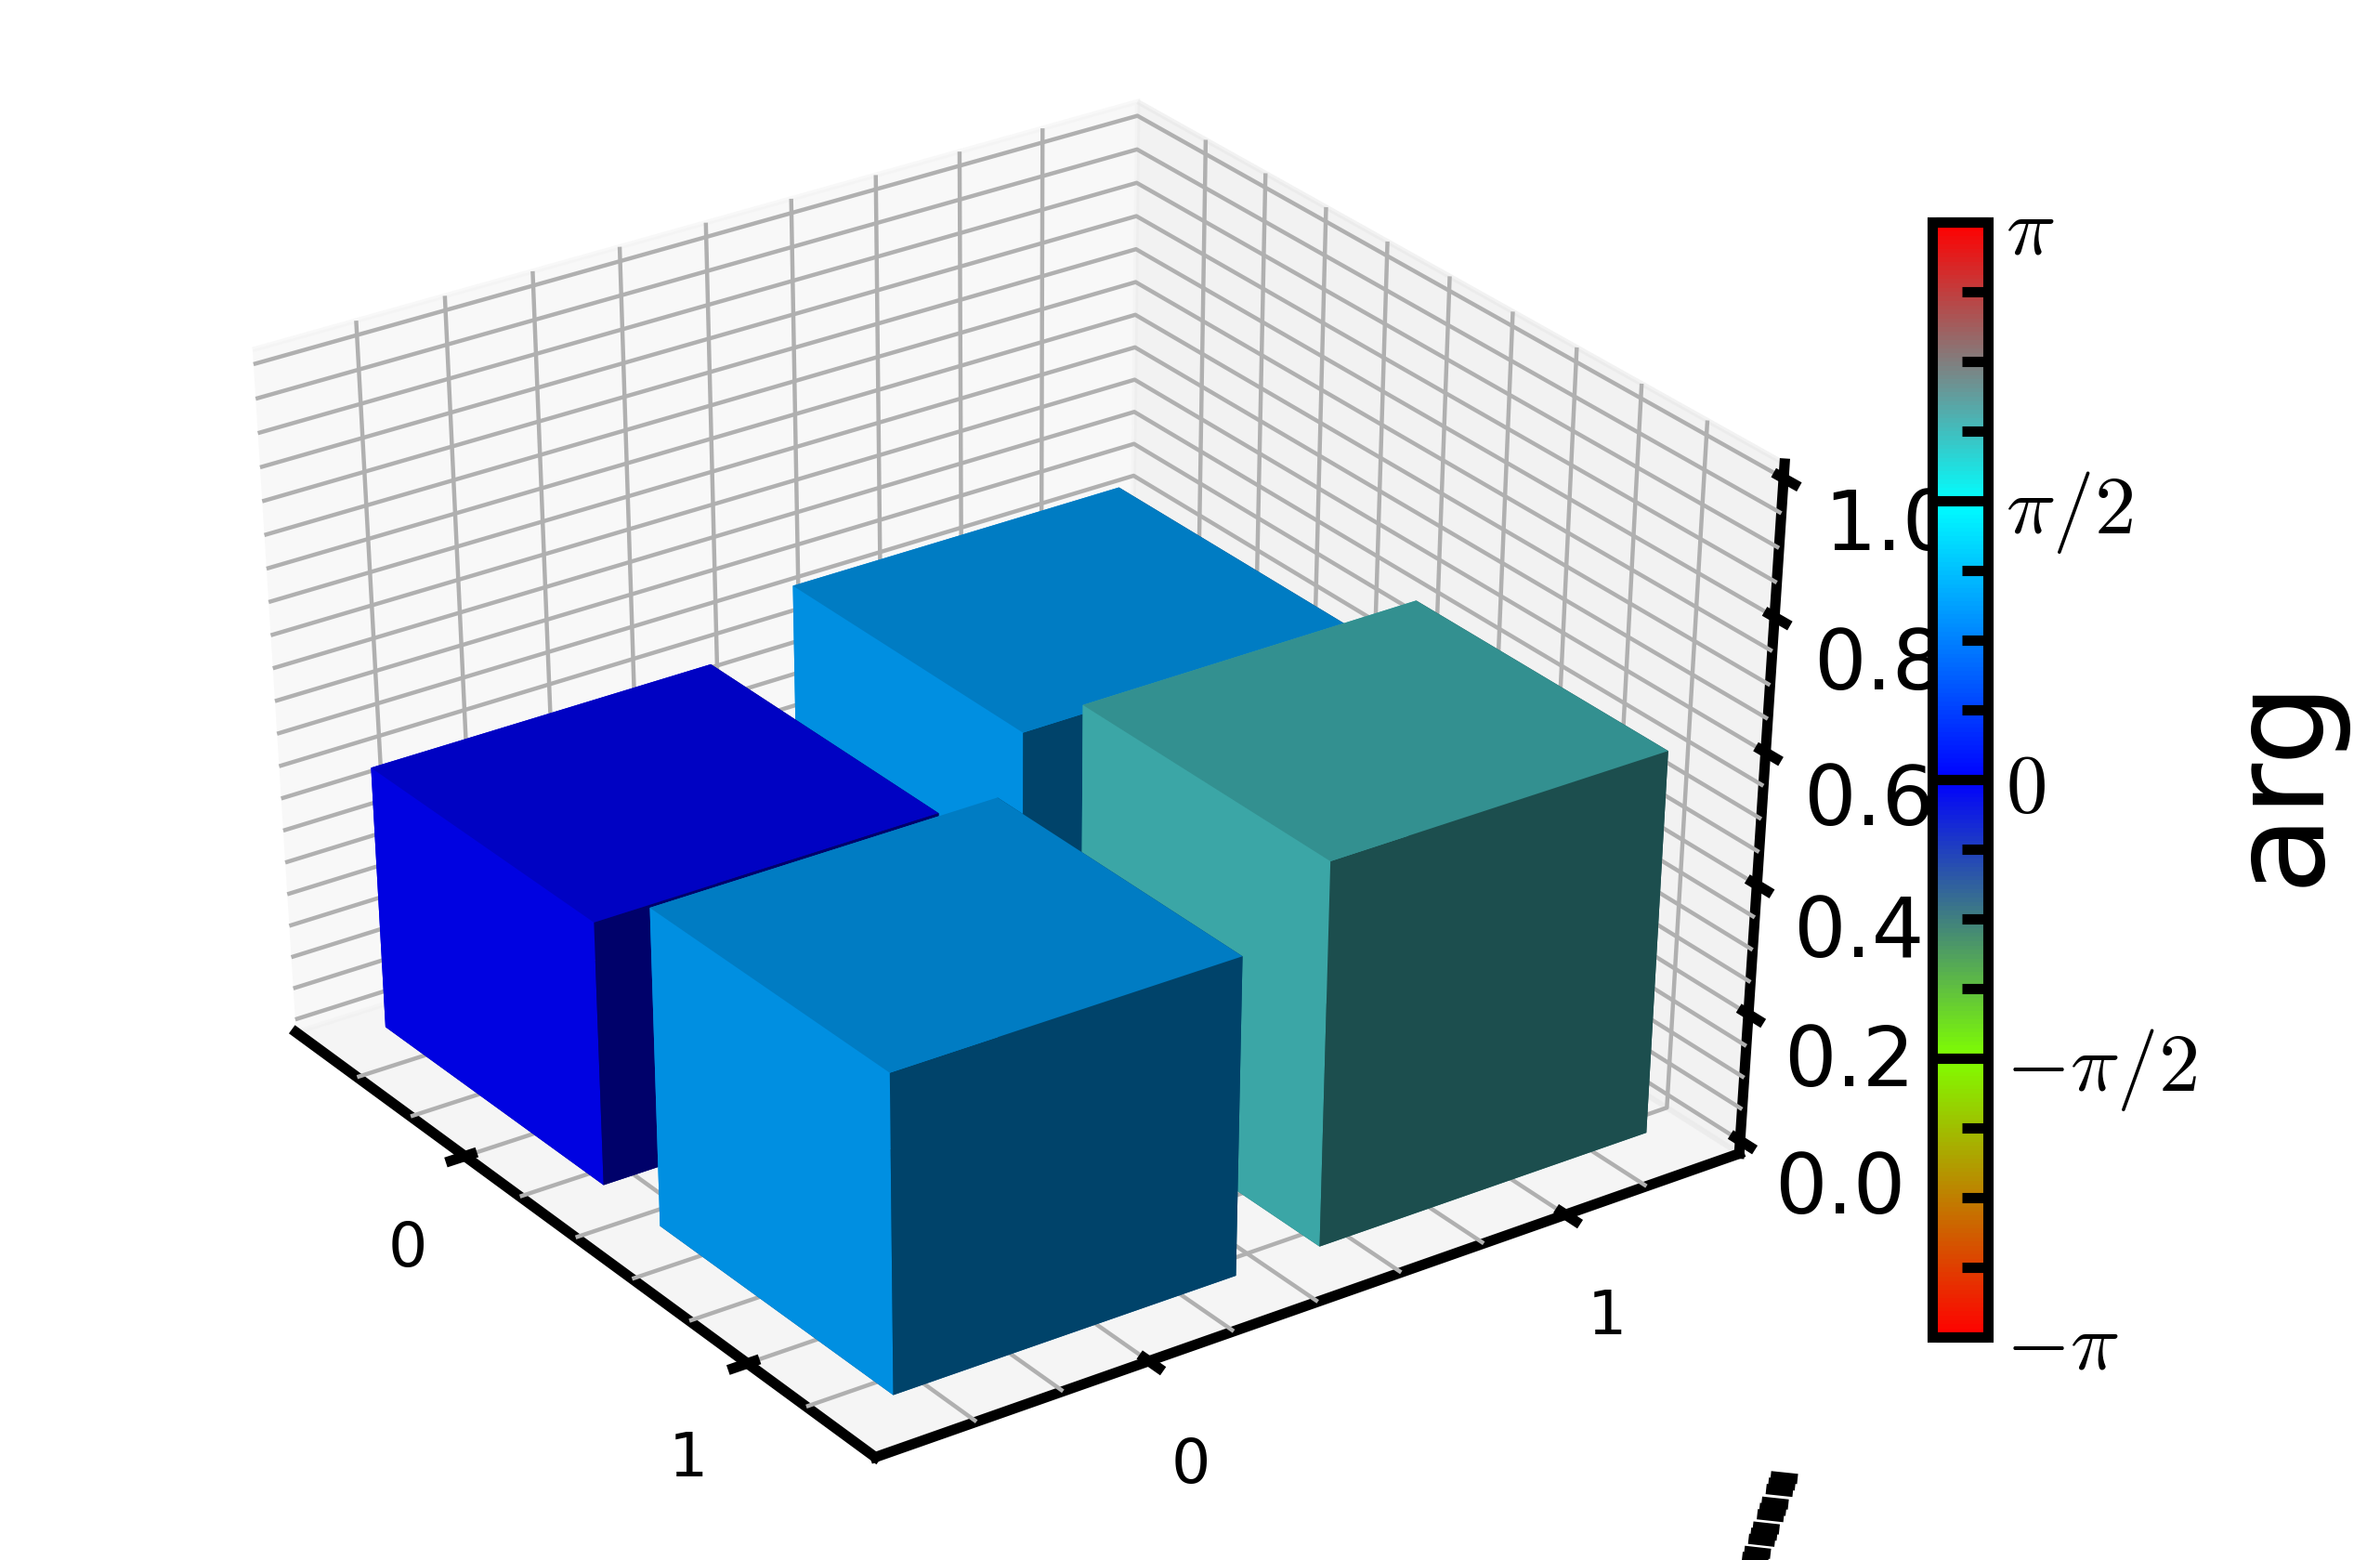

In [4]:
#Can also define matrices
psi0 = np.matrix([1,0]).transpose()
psi1 = np.matrix([0,1]).transpose()
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
# psi = Qobj(psi)
# rho = ket2dm(psi)
#or
rho = psi*psi.transpose()
rho = Qobj(rho)
matrix_histogram_complex(rho)

## Quantum fidelity

See http://qutip.org/docs/4.0.2/modules/qutip/metrics.html

Definition: 

a. State fidelity
$$ \mathcal{F}(\rho,\sigma)=\left(\mathrm{Tr}\sqrt{\rho^{1/2}\sigma\rho^{1/2}} \right)^2$$
from which the fidelity between a pure state $|\psi \rangle$ and an arbitrary state $\rho$ can be written as
$$\mathcal{F}(\rho,\psi)=\sqrt{\langle\psi |\rho |\psi\rangle}$$

b. Process fidelity

If the $\chi$ matrix is known, then the fidelity to the ideal state $\chi'$ is 
$$ \mathcal{F}(\chi,\chi')=\left(\mathrm{Tr}\sqrt{\chi^{1/2}\chi '\chi^{1/2}} \right)^2$$

From Pedersen et al., the fidelity between two unitary operations $U$ and $U_o$ is
$$\mathcal{F}=\frac{1}{N(N+1)}\left[\mathrm{Tr}(MM^\dagger) + |\mathrm{Tr}(M)|^2 \right],$$
with $M=U_0^\dagger U$ and $N=2^n$ is the dimension of the Hilbert space

In [79]:
#Using qutip's built in fidelity functions
from qutip import fidelity
psi0 = basis(2,0)
psi1 = basis(2,1)
a=1
b=1
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
print("state fidelity between 0 and 1: ", fidelity(psi0,psi1))
print("state fidelity between 1 and 1:", fidelity(psi1,psi1))
print("state fidelity between 1 and superposition:", fidelity(psi1,psi))

from qutip.qip.operations import cnot
from qutip.qip.operations import csign
from qutip import process_fidelity
cz = csign()
iden = identity(4)
print("process fidelity between cz and cnot: ", process_fidelity(cz,cnot()))
print("process fidelity between cz and cz: ", process_fidelity(cz,cz))
# print("process fidelity between cz and I: ", process_fidelity(cz,iden))

#Or define it ourselves
rho0 = np.array([[1,0],[0,0]])
rho1 = np.array([[0,0],[0,1]])
rho = np.array([[1,1],[1,1]])/np.sqrt(2)


def state_fidelity_func(rho,rho_ideal):
    f = abs(np.trace(scipy.linalg.sqrtm(scipy.linalg.sqrtm(rho_ideal).dot(rho).dot(scipy.linalg.sqrtm(rho_ideal)))))
    return f**2

def process_fidelity_func(U,U_ideal,qubit_num):
    N = 2**qubit_num
    coeff = (N*(N+1))**-1.0
    M = np.conj(U_ideal.transpose()) * U
    f = np.trace(M*np.conj(M.transpose())) + np.trace(M)**2
    return coeff * f

print ('State fidelity as defined, 0 and 1: ', state_fidelity_func(rho0,rho1))    
print ('State fidelity as defined, 0 and 0: ',state_fidelity_func(rho0,rho0))    
print ('State fidelity as defined, 0 and superposition: ', state_fidelity_func(rho0,rho))    
U_cz = np.diag([1,1,1,-1])
U_cnot = np.diag([1,1,0,0])
U_cnot[2,3] = 1
U_cnot[3,2] = 1
U_iden = np.diag([1,1,1,1])
print("Defined process fidelity between cz and cnot: ", process_fidelity_func(U_cz,U_cnot, 2))
print("Defined process fidelity between cz and cz: ", process_fidelity_func(U_cz,U_cz, 2))


state fidelity between 0 and 1:  0.0
state fidelity between 1 and 1: 1.0
state fidelity between 1 and superposition: 0.7071067811865475
process fidelity between cz and cnot:  0.5
process fidelity between cz and cz:  1.0
State fidelity as defined, 0 and 1:  0.0
State fidelity as defined, 0 and 0:  1.0
State fidelity as defined, 0 and superposition:  0.7071067811865471
Defined process fidelity between cz and cnot:  0.30000000000000004
Defined process fidelity between cz and cz:  1.0


# Pauli Transfer Matrix (PTM)
## Two-qubit gate

<ipython-input-5-706526f87b63>:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]


(<Figure size 3200x2400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd6d5e5220>)

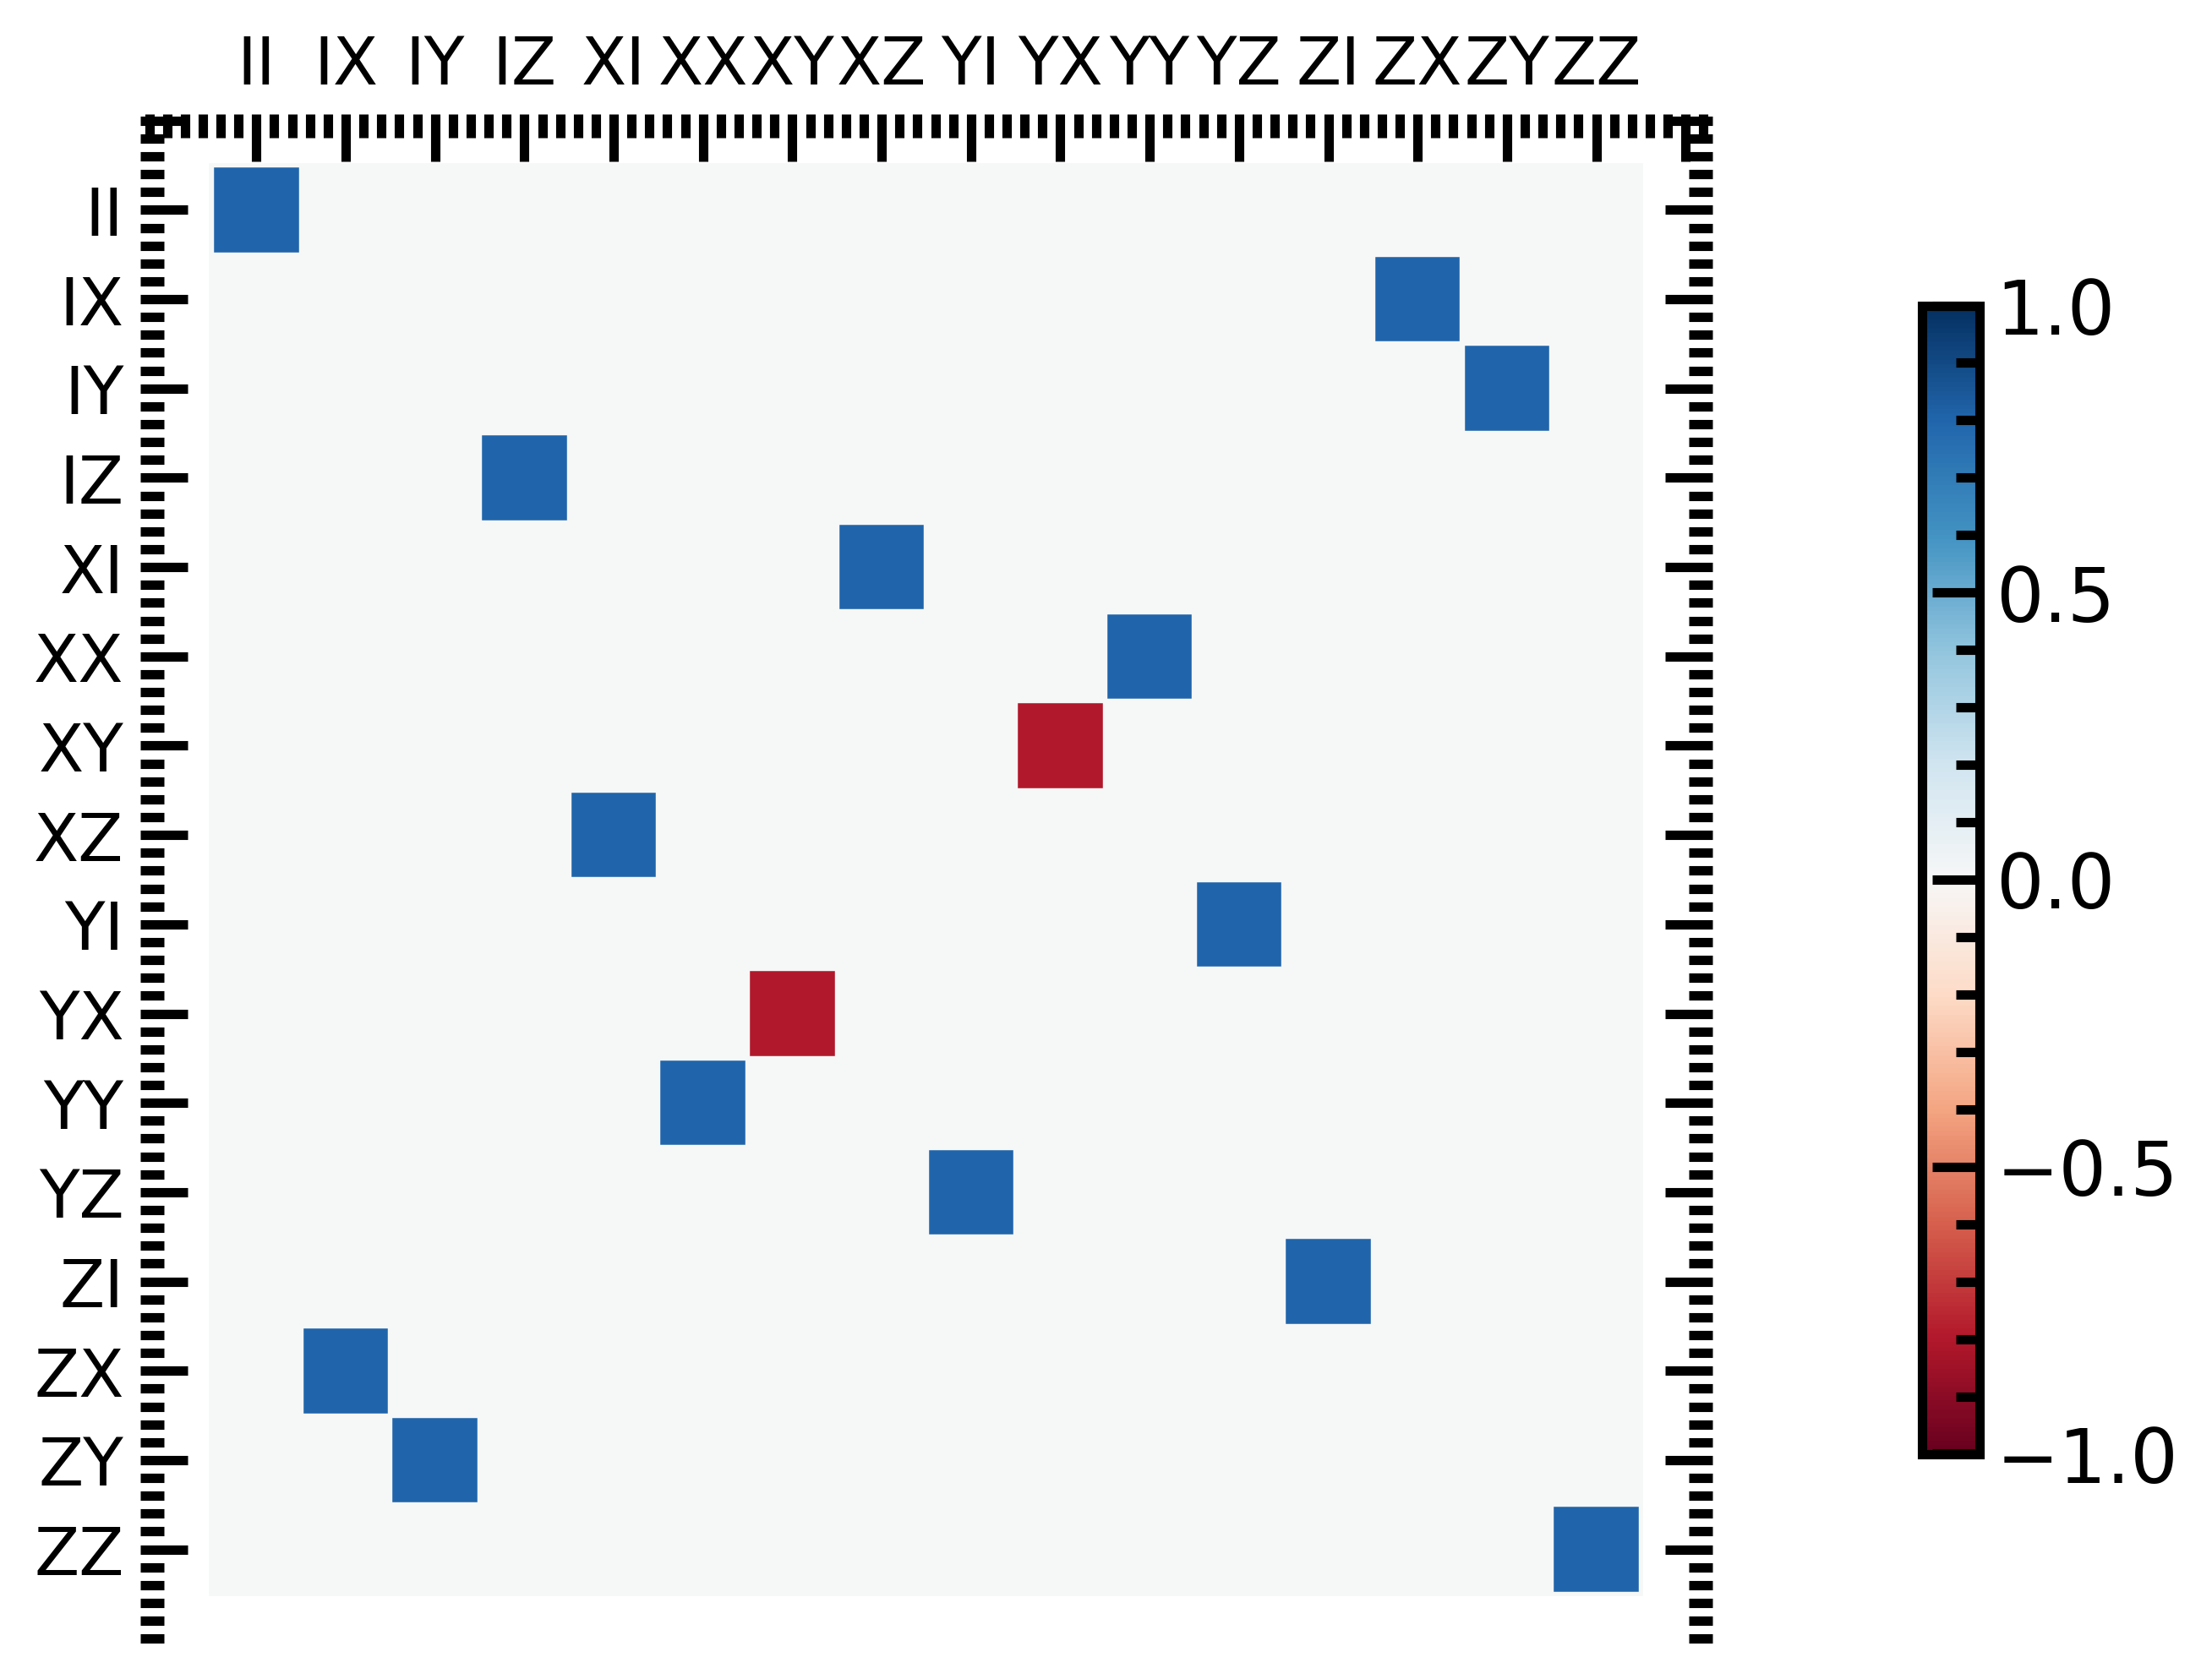

In [5]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
gate_op = cphase(np.pi)
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        p_out[i,j] = expect(rot_j, gate_op*(rot_i*gnd_state))        
ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]

str_primitive = ["I","X","Y","Z"]
op_label = []
for prim1 in str_primitive:
    for prim2 in str_primitive:
        op_label.append(prim1+prim2)
# print (op_label)
qutip.hinton(ptm_ideal_2q, xlabels = op_label, ylabels = op_label)

## Single-qubit gate

In [6]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

p_in = np.zeros((4,4))
p_out = np.zeros((4,4))

gate = ry(np.pi/2)

prep_rotations = [I, sx, sx2, sy2]
meas_rotations = [I, sx, sy, sz]
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
        p_out[i,j] = expect(meas, gate*prep*basis(2,0))
        
ptm_ideal_1q =  np.linalg.lstsq(p_in, p_out)[0] 
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal_1q, xlabels = op_label, ylabels = op_label)

NameError: name 'I' is not defined

# Quantum process tomography for $\chi$
## Single qubit gate

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7ff4e8a2a850>)

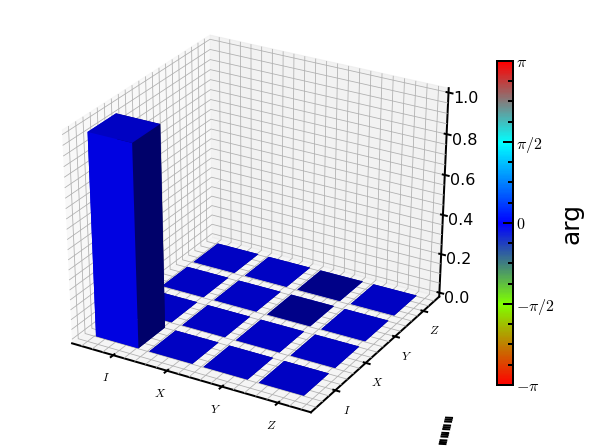

In [17]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*basis(2,0)
    rho = ket2dm(rho)
    rho_input.append(rho)
    
gate_op = qeye(2)
# Assume that the output states can be determined via quantum state tomography
rho_output = []
for idx in range (len(rho_input)):
    rho = gate_op*rho_input[idx]*gate_op
    rho_output.append(rho)

    #Decoherence process
#Relaxation
# gamma1 = 1
# gamma2 = 1
# t = 5
# rho_output[0] = np.array([[np.exp(-gamma1*t), 0], [0, 1-np.exp(-gamma1*t)]])
# rho_output[1] = np.array([[0,0],[0,1]])
# rho_output[2] = np.array([[0.5*np.exp(-gamma1*t),0.5*np.exp(-gamma1*t/2)],[0.5*np.exp(-gamma1*t/2), 1-0.5*np.exp(-gamma1*t)]])
# rho_output[3] = np.array([[0.5*np.exp(-gamma1*t),-0.5j*np.exp(-gamma1*t/2)],[0.5j*np.exp(-gamma1*t/2),1-0.5*np.exp(-gamma1*t)]])
#Dephasing
# rho_output[0] = np.array([[1,0],[0,0]])
# rho_output[1] = np.array([[0,0],[0,1]])
# rho_output[2] = np.array([[0.5,0.5*np.exp(-gamma2*t)],[0.5*np.exp(-gamma2*t),0.5]])
# rho_output[3] = np.array([[0.5,-0.5j*np.exp(-gamma2*t)],[0.5j*np.exp(-gamma2*t),0.5]])

# Quantum process tomography
n = 1
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(4):
    for k in range(4):
        la[k+4*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(4):
            for n in range(4):
                 beta[k+4*j, n+4*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (4,4)).transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["","$I$", "$X$", "$Y$", "$Z$"] for i in range (1)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

## Two-qubit gate

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7ff4d3695580>)

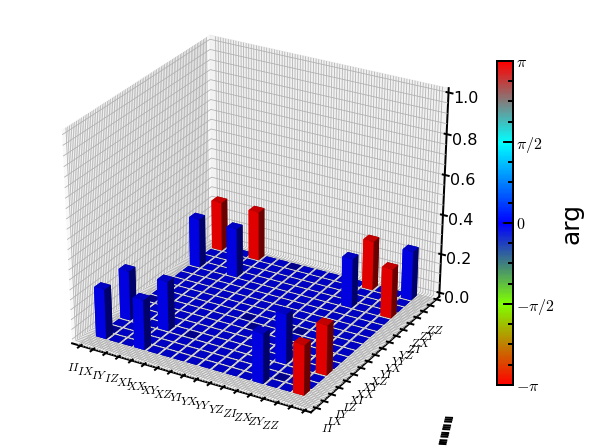

In [24]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
gate_op = cphase(np.pi)

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*gnd_state
    rho = ket2dm(rho)
    rho_input.append(rho)
    
# Assume that the output states can be determined via quantum state tomography
rho_output = []
for idx in range (len(rho_input)):
    rho = gate_op*rho_input[idx]*gate_op
    rho_output.append(rho)

# Quantum process tomography
n = 2
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(16):
    for k in range(16):
        la[k+16*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(16):
            for n in range(16):
                 beta[k+16*j, n+16*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (16,16)).transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range (2)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

## Converting PTM to $\chi$
### Single-qubit gate

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7ff4c4b6af40>)

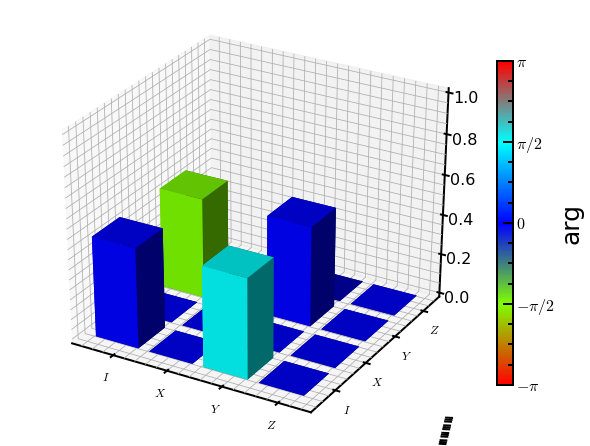

In [160]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = prep_generator

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = meas_generator

# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*basis(2,0)
    rho = ket2dm(rho)
    rho_input.append(rho)

    gate = ry(np.pi/2)
# Reconstruct the output states from PTM data
p_in = np.zeros((4,4))
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
#         p_out[i,j] = expect(meas, gate*prep*basis(2,0))

p_out = p_in@ptm_ideal_1q

rho_output = []
for idx in range (len(rho_input)):
    rho = 0
    for j, meas in enumerate(meas_rotations):
        rho = rho + 0.5*p_out[idx,j]*meas
    rho_output.append(rho)
    
# Quantum process tomography
n = 1
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(4):
    for k in range(4):
        la[k+4*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(4):
            for n in range(4):
                 beta[k+4*j, n+4*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (4,4)).transpose()
op_label = [["","$I$", "$X$", "$Y$", "$Z$"] for i in range (1)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)

### Two-qubit gate

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7ff4c5583be0>)

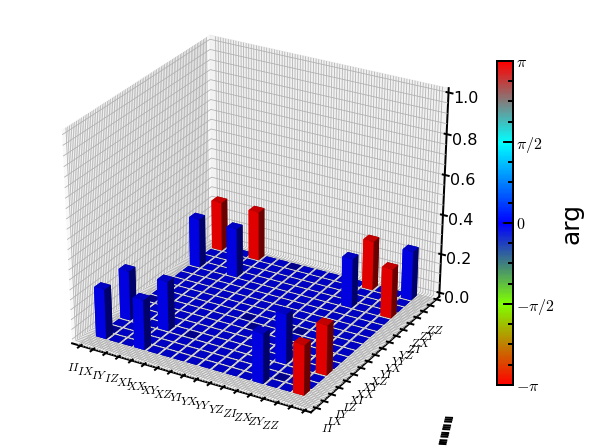

In [162]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16))  
gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
gate_op = cphase(np.pi)
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        
# Define set of input states
rho_input = []
for i, prep in enumerate(prep_rotations):
    rho = prep*gnd_state
    rho = ket2dm(rho)
    rho_input.append(rho)
    
#Get output states from PTM    
p_out = p_in@ptm_ideal_2q
rho_output = []
for idx in range (len(rho_input)):
    rho = 0
    for j, meas in enumerate(meas_rotations):
        rho = rho + 0.25*p_out[idx,j]*meas
    rho_output.append(rho)
    
# Quantum process tomography
n = 2
d =2**n
la = np.zeros(d**4, dtype = complex)
chi = np.zeros(d**4, dtype = complex)
beta = np.zeros((d**4,d**4), dtype = complex)
for j in range(16):
    for k in range(16):
        la[k+16*j] = (rho_output[j]*rho_input[k]).tr()
        for m in range(16):
            for n in range(16):
                 beta[k+16*j, n+16*m] = (meas_rotations[m]*rho_input[j]*meas_rotations[n]*rho_input[k]).tr()

kappa = np.linalg.inv(beta)
chi = kappa.dot(la)
chi = np.reshape(chi, (16,16)).transpose()
# for m in range(4):
#     for n in range(4):
#         for j in range(4):
#             for k in range(4):
#                 chi[n+4*m] = chi[n+4*m]+ kappa[m,n,j,k]*la[j,k]

op_label = [["$I$", "$X$", "$Y$", "$Z$"] for i in range (2)]

chi = Qobj(chi)
qpt_plot_combined(chi, op_label)    

In [165]:
fname = '/Users/longnguyen/Downloads/CZ_chi.txt'
data = np.genfromtxt(fname)
print (data.shape)

(16, 16)


# ZZ measurement
Here we emulate what we see when we measure the ZZ interaction between qubits

In [7]:
from qutip.qip.operations import*
from scipy.optimize import curve_fit
#Define some useful functions. Independent from previous cells

def bare_qubit(freq):
    #Two-level system
    return -0.5*2*np.pi*freq*sigmaz()

def cos_fit(t,amp,freq,c1,c2):
    return amp*np.cos(2*np.pi*freq*(t-c1)) - c2

def coupled_qubits(freq1, freq2, zetaZZ):
    #Coupled two-level system
    iz = tensor(qeye(2), sigmaz())
    zi = tensor(sigmaz(), qeye(2))
    zz = tensor(sigmaz(), sigmaz())
    return -0.5*2*np.pi*(freq1*zi + freq2*iz +zetaZZ*zz)

In [8]:
zii = tensor(sigmaz(), qeye(2), qeye(2))
izi = tensor(qeye(2), sigmaz(), qeye(2))
iiz = tensor(qeye(2), qeye(2), sigmaz())
izz = tensor(qeye(2), sigmaz(), sigmaz())
zzi = tensor(sigmaz(), sigmaz(), qeye(2))
ziz = tensor(sigmaz(), qeye(2), sigmaz())
zzz = tensor(sigmaz(), sigmaz(), sigmaz())
    
def three_coupled_qubits(freq1, freq2, freq3, zetaZZI, zetaIZZ, zetaZIZ, zetaZZZ):
    #Coupled two-level systems. We omit the ZIZ term for now
    return -0.5*2*np.pi*(freq1*zii + freq2*izi + freq3*iiz 
                         + zetaZZI*zzi + zetaIZZ*izz + zetaZIZ*ziz + zetaZZZ*zzz)

## Ramsey measurement
### Single qubit

Frequency is: 5.000107841973533GHz


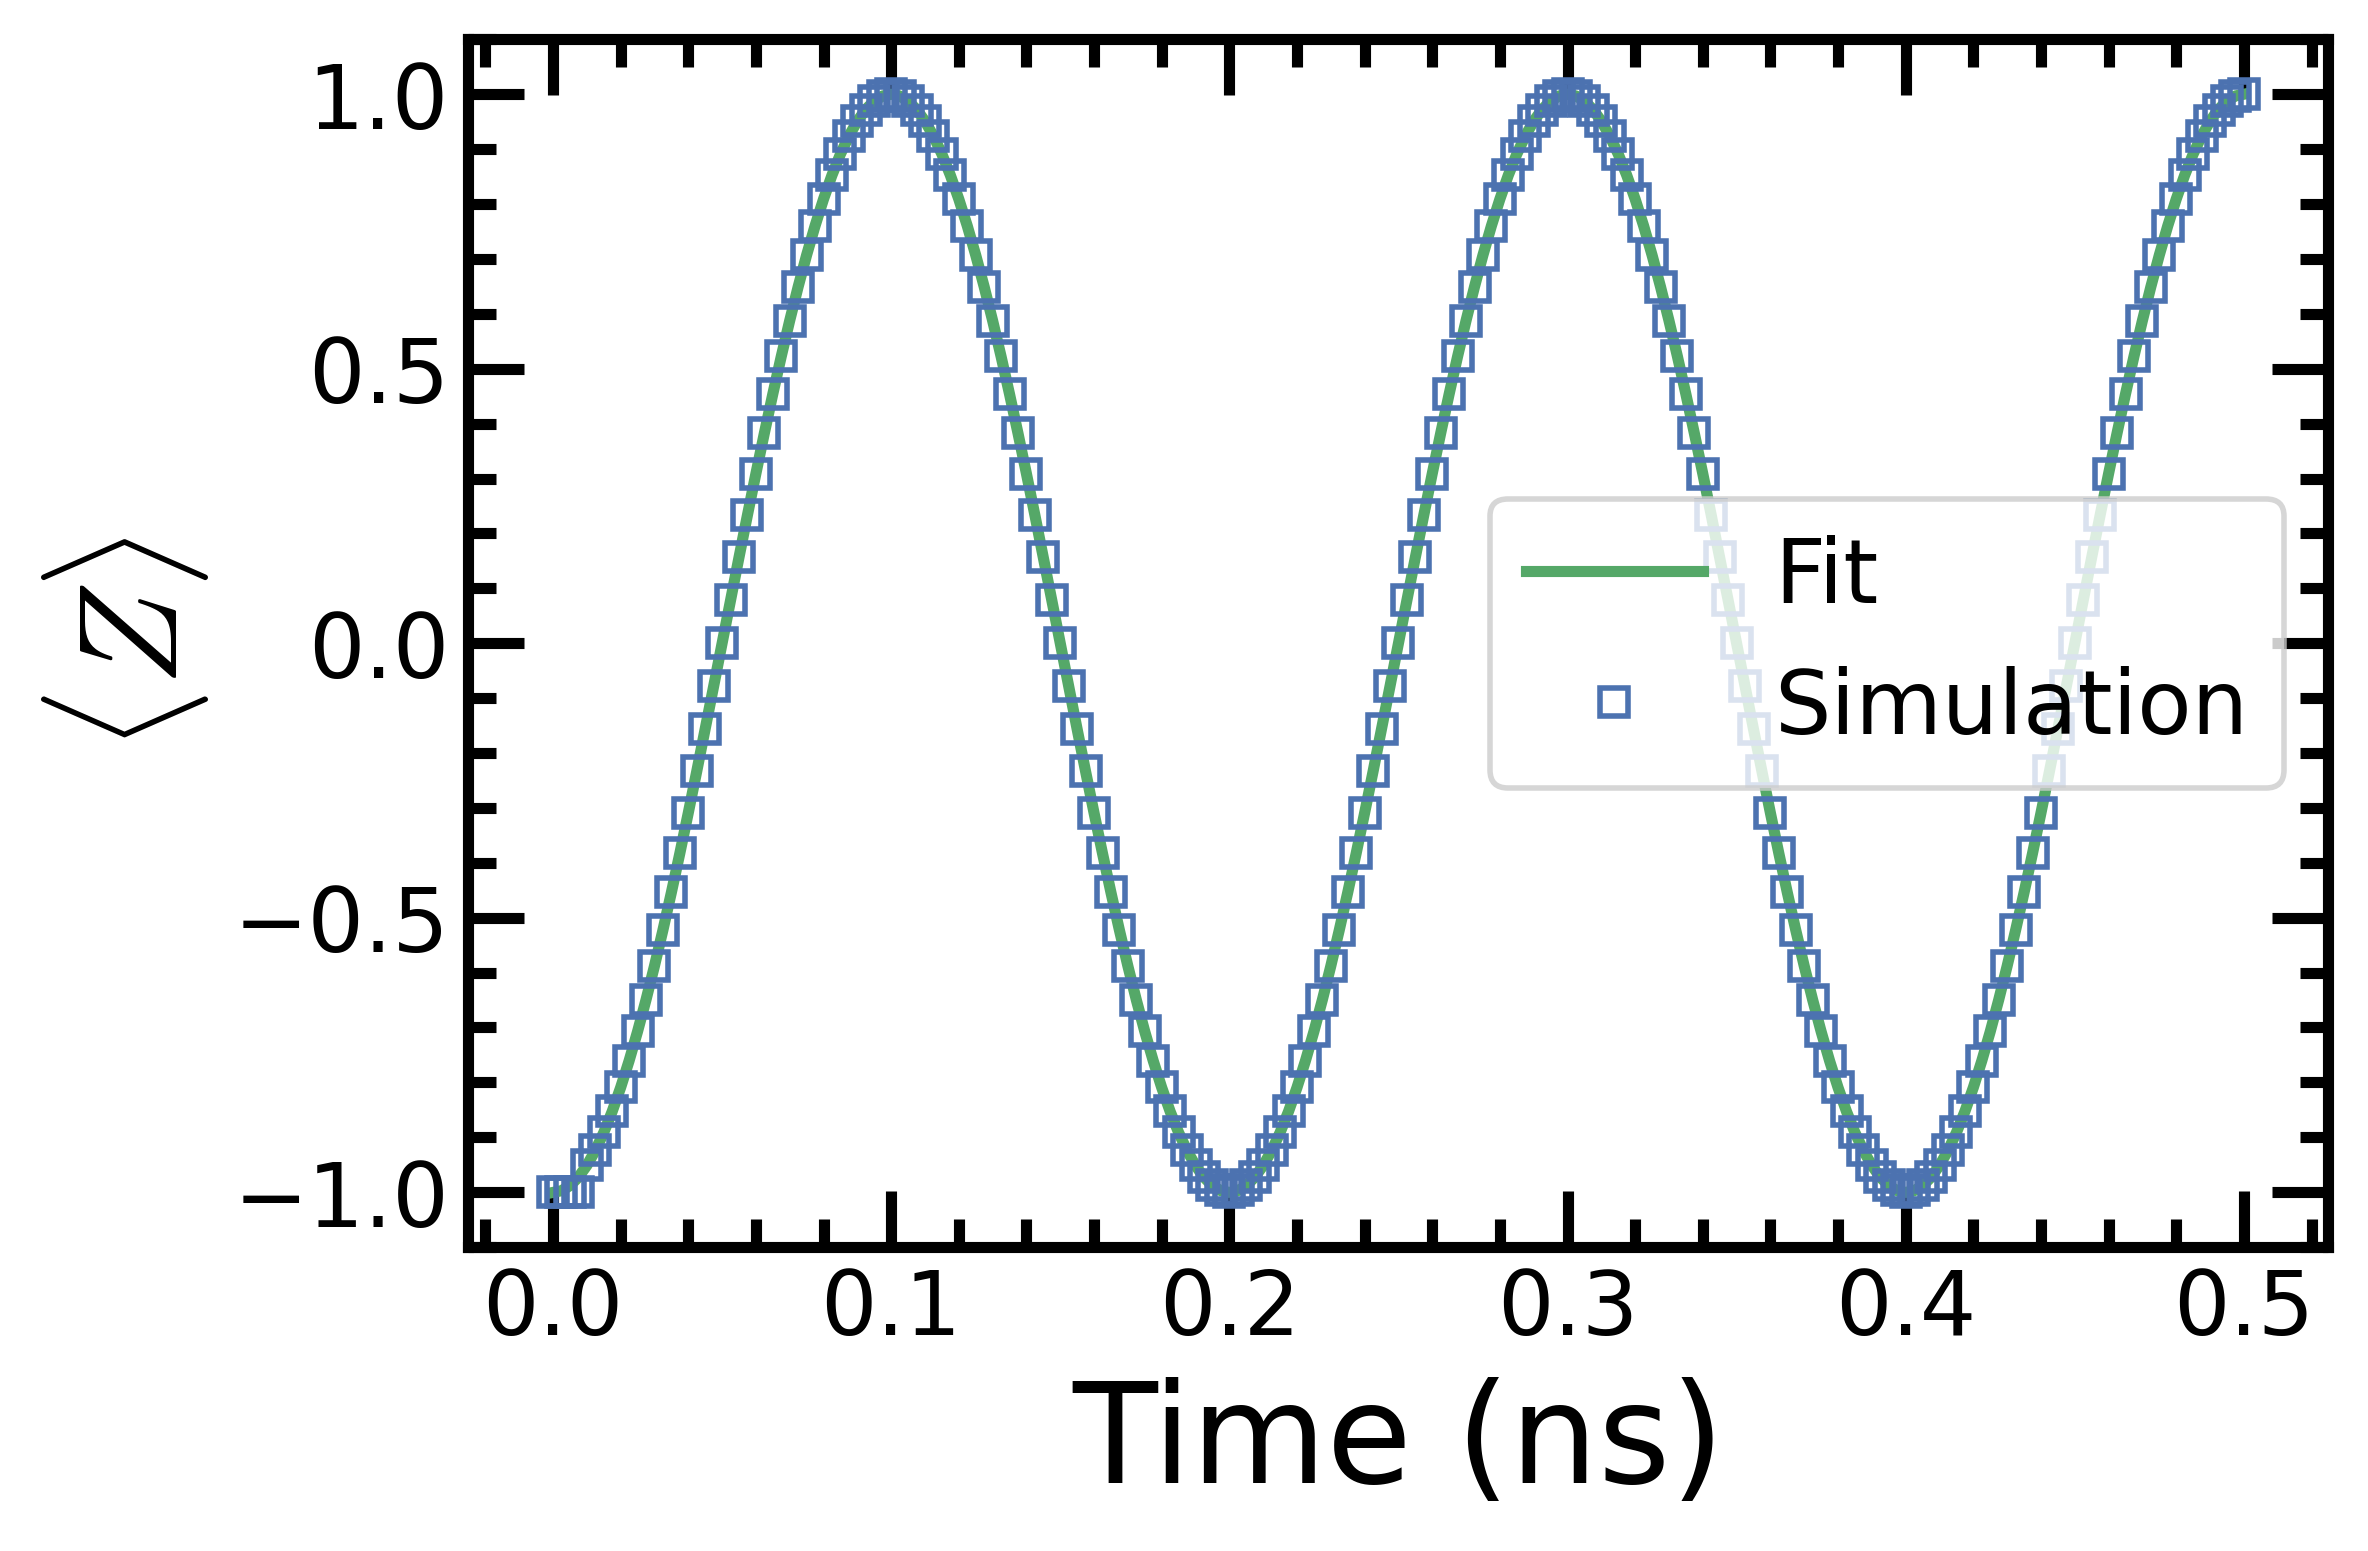

In [9]:
#To get some intuition, first consider a Ramsey measurement
h0 = bare_qubit(5) #Note that this the lab frame, so the measurement give us the rotation freq in the lab frame.
# h0 = bare_qubit(0.1) #Rotating frame instead. The freq is the detuning between drive and qubit
_,eig_vec = h0.eigenstates()
ini_state = eig_vec[0]

t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = ry(np.pi/2)*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h0, state_1, t_list).states
    state_3 = ry(np.pi/2)*state_2[-1]
    meas_result[t_idx] = expect(sigmaz(),state_3)

plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation')

opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-8)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit')

plt.ylabel(r'$\langle Z \rangle$')
plt.xlabel(r'Time (ns)')
plt.legend()
print ("Frequency is: " + str(opt[1]) + 'GHz')

### Two_qubit: Conditional Ramsey

Frequency of 00 is: 5.010110455973394GHz
Frequency of 01 is: 4.990107684222161GHz
zz rate is: 0.01000138587561672GHz


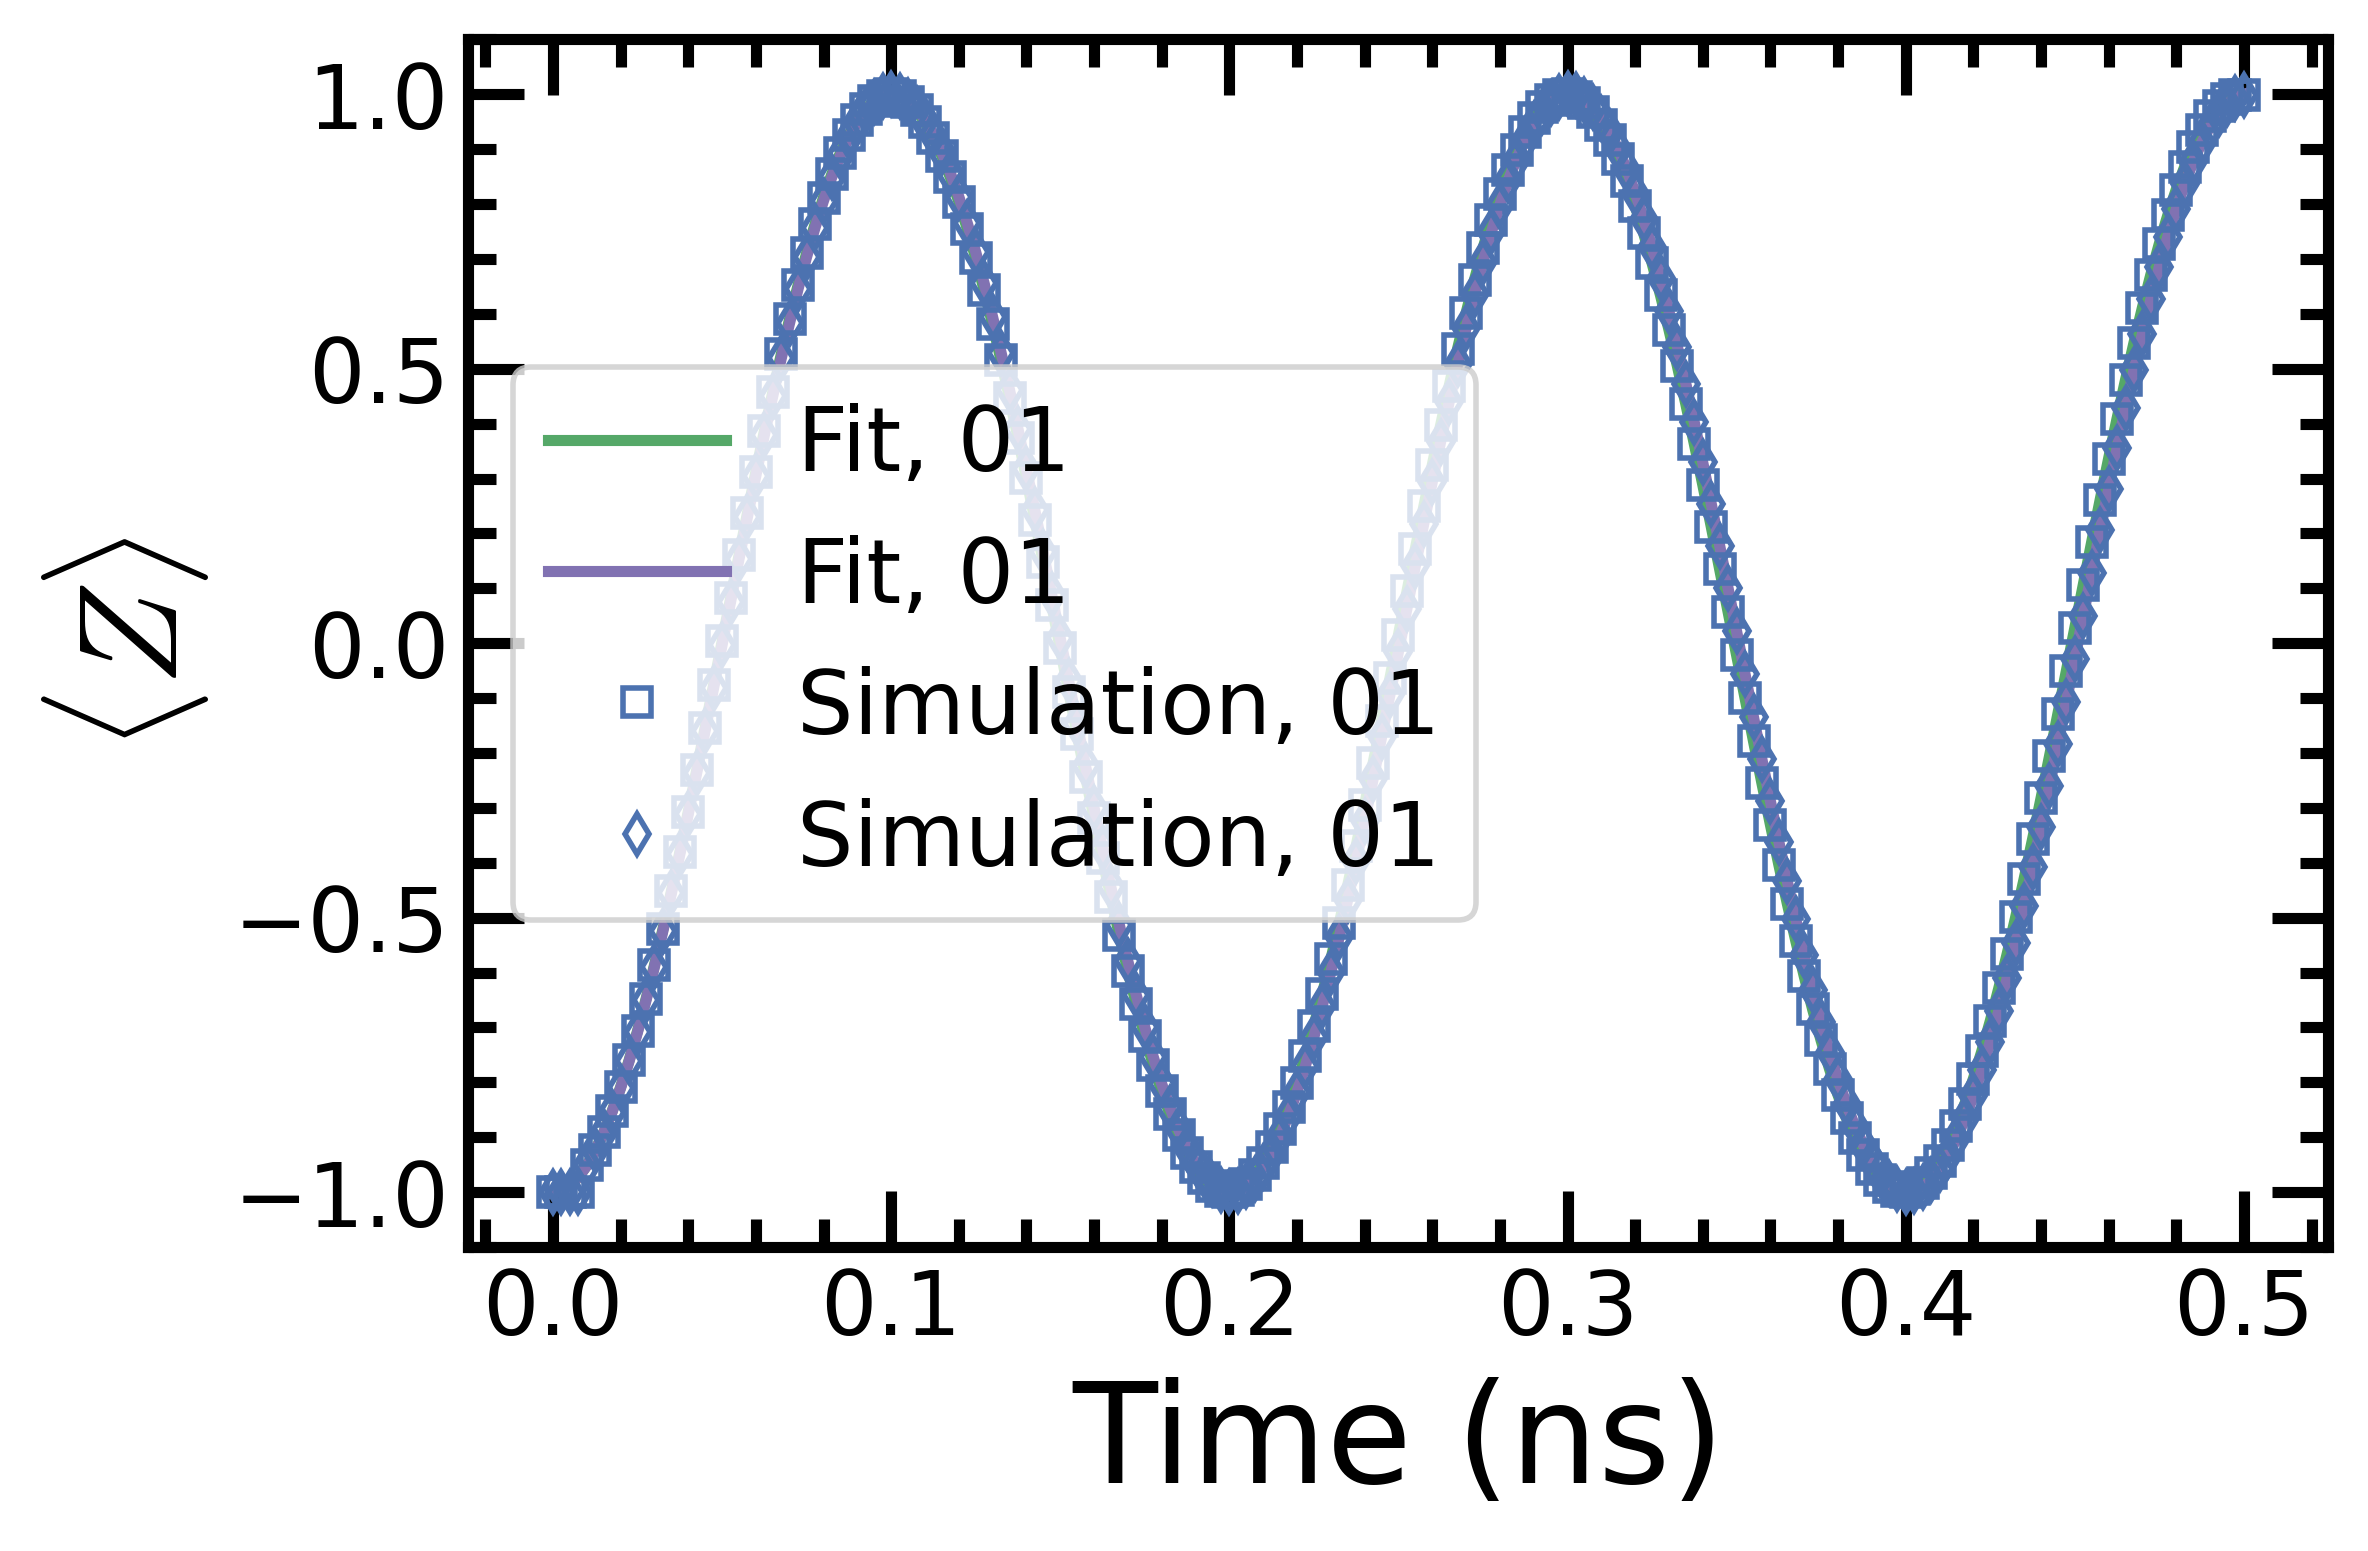

In [10]:
#Conditional Ramsey
h = coupled_qubits(5,5.1,0.01) #Lab frame
_,eig_vec = h.eigenstates()
ini_state = eig_vec[0]
t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2)),state_3)

plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
freq_00 = opt[1]
print ("Frequency of 00 is: " + str(freq_00) + 'GHz')

ini_state = eig_vec[2]
t_sweep = np.linspace(0,0.5,201) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(100*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2)),state_3)

plt.errorbar(t_sweep,meas_result, fmt='d', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 5, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')

plt.ylabel(r'$\langle Z \rangle$')
plt.xlabel(r'Time (ns)')
plt.legend()

freq_01 = opt[1]
print ("Frequency of 01 is: " + str(freq_01) + 'GHz')
print ("zz rate is: " + str(abs(freq_01-freq_00)/2.0) + 'GHz')

### Three qubits, no ZZZ case

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


f_000=1.0250004693005408GHz
f_010=0.9849991277828906GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


f_001=1.0149991542366663GHz
f_011=0.9750003639050683GHz


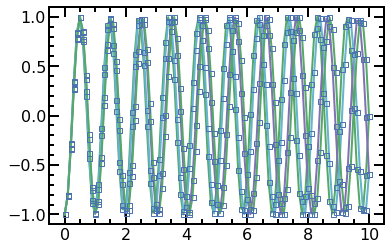

In [340]:
## NO ZZZ
h = three_coupled_qubits(freq1=1.0, freq2=1.1, freq3=1.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.00) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10

ini_state = eig_vec[0] #000
t_sweep = np.linspace(0,T_gate,101) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_000 = opt[1]
print ("f_000=" + str(freq_000) + 'GHz')

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_010 = opt[1]
print ("f_010=" + str(freq_010) + 'GHz')

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_001 = opt[1]
print ("f_001=" + str(freq_001) + 'GHz')

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(10*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, 1, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_011 = opt[1]
print ("f_011=" + str(freq_011) + 'GHz')

In [342]:
print ((freq_000-freq_010)/2)
print ((freq_001-freq_011)/2)

print ((freq_000-freq_001)/2)
print ((freq_010-freq_011)/2)

0.020000670758825112
0.019999395165799017
0.005000657531937236
0.0049993819389111405


### Three-qubit, add ZZZ


f_000=0.22699860969158606GHz
f_010=0.18299837939991592GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


f_001=0.21299840963710664GHz
f_011=0.17699872901365074GHz


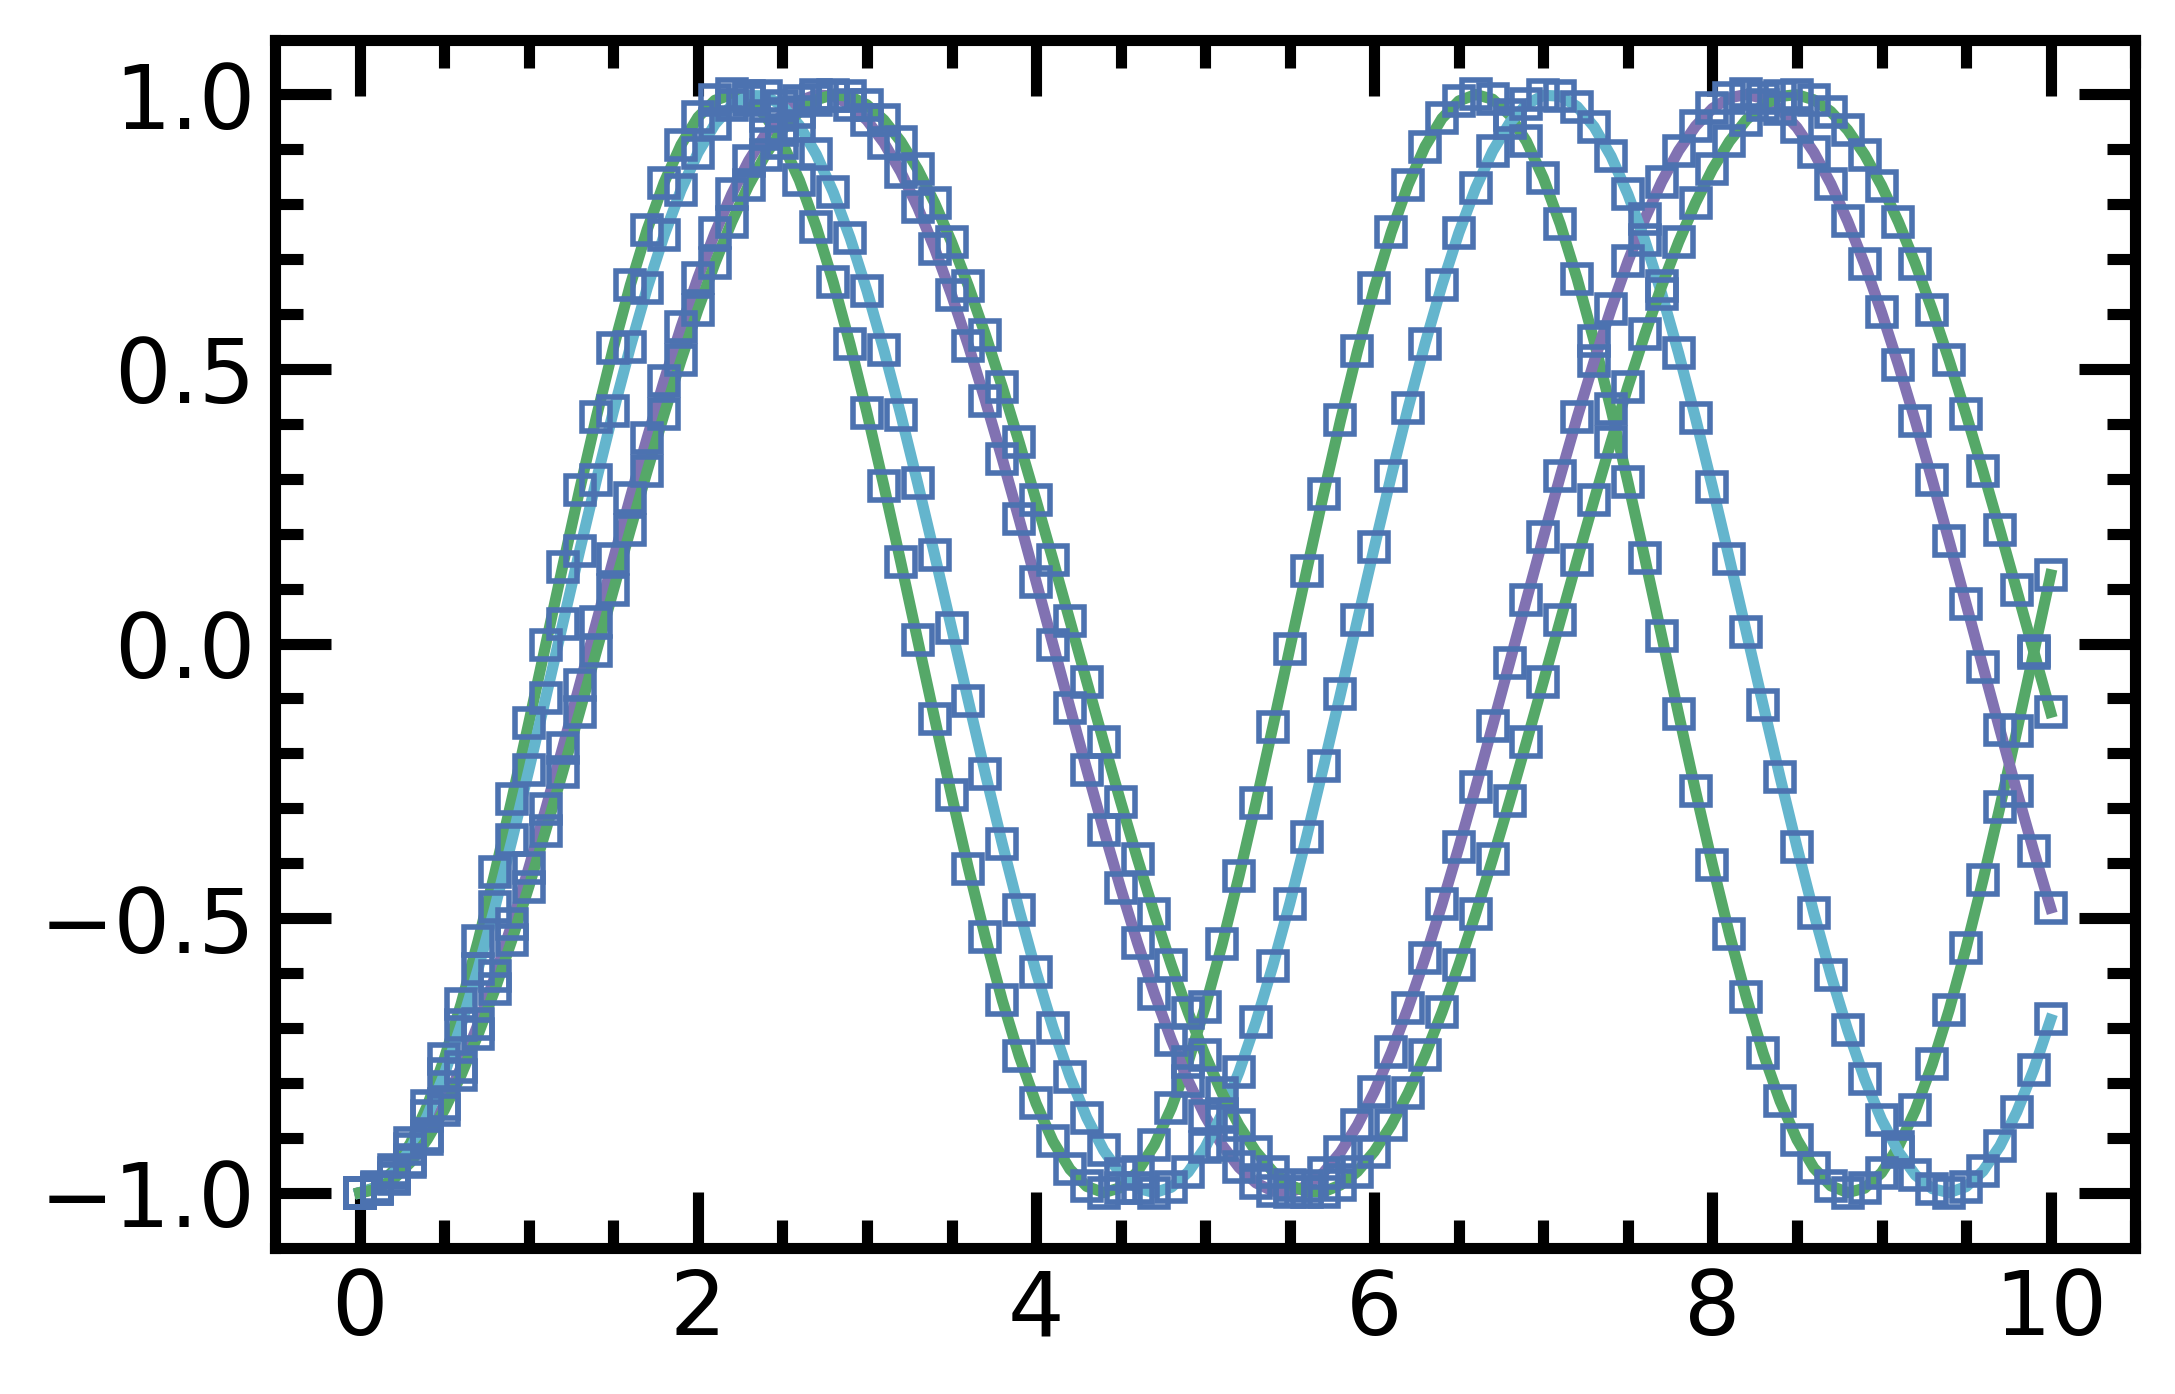

In [29]:
## NO ZZZ
h = three_coupled_qubits(freq1=0.2, freq2=0.3, freq3=0.4, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.002) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10

ini_state = eig_vec[0] #000
t_sweep = np.linspace(0,T_gate,101) #Time in ns if freq is in GHz 
meas_result = np.zeros_like(t_sweep)
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_000 = opt[1]
print ("f_000=" + str(freq_000) + 'GHz')

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_010 = opt[1]
print ("f_010=" + str(freq_010) + 'GHz')

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_001 = opt[1]
print ("f_001=" + str(freq_001) + 'GHz')

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2), qeye(2), qeye(2))*ini_state
for t_idx, T_gate in enumerate (t_sweep):
    t_list = np.linspace(0,T_gate,int(20*T_gate)+1)
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(ry(np.pi/2), qeye(2), qeye(2))*state_2[-1]
    meas_result[t_idx] = expect(tensor(sigmaz(),qeye(2),qeye(2)),state_3)
plt.errorbar(t_sweep,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = t_sweep, p0 = [-1, .2, 0, 0], xtol = 1e-10)
plt.plot(t_sweep, cos_fit(t_sweep, *opt), linewidth= 2.0,  linestyle = '-')
freq_011 = opt[1]
print ("f_011=" + str(freq_011) + 'GHz')

In [31]:
print ((freq_000-freq_010)/2)
print ((freq_001-freq_011)/2)

print ((freq_000-freq_001)/2)
print ((freq_010-freq_011)/2)

print (((freq_000-freq_010)/2 - (freq_001-freq_011)/2)/2)
print (((freq_000-freq_001)/2- (freq_010-freq_011)/2)/2)

0.022000115145835067
0.017999840311727952
0.007000100027239706
0.002999825193132591
0.0020001374170535574
0.0020001374170535574


## JAZZ measurement

ZZ rate =  0.010000009055614706  GHz


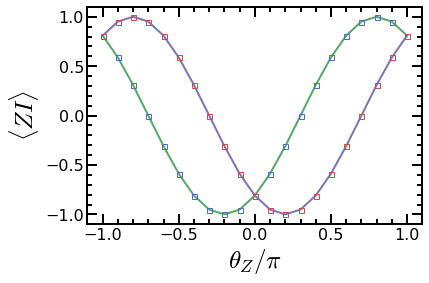

In [304]:
#Now, using JAZZ sequence
h = coupled_qubits(5,5.1,0.01) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 10 #ns
t_list = np.linspace(0,T_gate/2,int(20*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_sweep)

ini_state = eig_vec[0]
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi),rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi), qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.1, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
phase_00 = opt[2]/(2*np.pi)
# print ("Frequency of 00 is: " + str(freq_00) + 'GHz')

ini_state = eig_vec[2]
state_1 = tensor(ry(np.pi/2), qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi),rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi), qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C2', ms = 5.0, label = 'Simulation, 01')
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.1, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label = 'Fit, 01')
plt.ylabel(r'$\langle ZI \rangle$')
plt.xlabel(r'$\theta_Z/\pi$')

phase_01 = opt[2]/(2*np.pi)
zz_rate = abs(phase_00 - phase_01)/T_gate/2
print ('ZZ rate = ',str(zz_rate),' GHz')

## JAZZZ

In [316]:
h = three_coupled_qubits(freq1=5, freq2=5.1, freq3=5.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.01) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 5 #ns
t_list = np.linspace(0,T_gate/2,int(50*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_sweep)

# 000 <-> 0
# 100 <-> 1
# 010 <-> 2
# 001 <-> 3
# 110 <-> 4
# 101 <-> 5
# 011 <-> 6
# 111 <-> 7

### Measure first qubit

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ZZI rate =  0.020000024457757216  GHz
ZZI rate =  0.020000024458435146  GHz
ZIZ rate =  0.005000008851799427  GHz
ZIZ rate =  0.0050000088524773546  GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


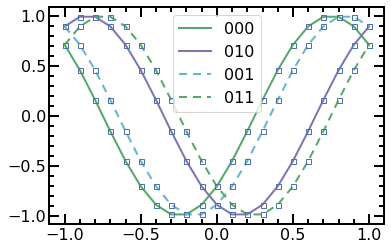

In [317]:
#Measure first qubit
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='010')
phase_010_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='001')
phase_001_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.5, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='011')
phase_011_q0 = opt[2]/(2*np.pi)
plt.legend()

zzi_rate = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
ziz_rate = abs(phase_000_q0 - phase_001_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')
ziz_rate = abs(phase_010_q0 - phase_011_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')

### Measure second qubit

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ZZI rate =  0.02000001798825693  GHz
ZZI rate =  0.02000001799005377  GHz
IZZ rate =  0.0150000139964481  GHz
IZZ rate =  0.015000013998244941  GHz


/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


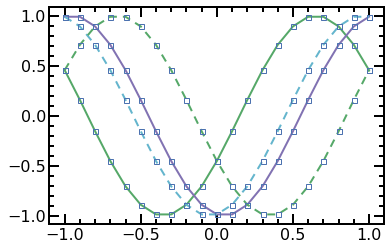

In [319]:
#Measure second qubit
ini_state = eig_vec[0] #000
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[1] #100
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_100_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='000')
phase_001_q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[5] #101
state_1 = tensor(qeye(2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(qeye(2),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(qeye(2), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='000')
phase_101_q1 = opt[2]/(2*np.pi)

zzi_rate = abs(phase_000_q1 - phase_100_q1)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q1 - phase_101_q1)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
izz_rate = abs(phase_000_q1 - phase_001_q1)/T_gate/2
print ('IZZ rate = ',str(izz_rate),' GHz')
izz_rate = abs(phase_100_q1 - phase_101_q1)/T_gate/2
print ('IZZ rate = ',str(izz_rate),' GHz')

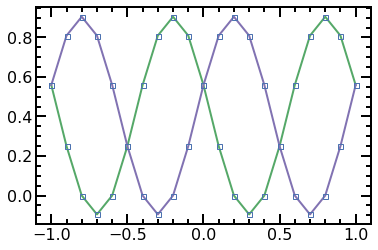

In [297]:
#Measure both first and second qubits
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-')
phase_000_q0q1 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),ry(np.pi/2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), rx(np.pi))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),ry(np.pi/2)*rz(phi),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(), sigmaz(), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-')
phase_001_q0q1 = opt[2]/(2*np.pi)


## Modified JAZZZ

In [32]:
h = three_coupled_qubits(freq1=5, freq2=5.1, freq3=5.2, zetaZZI=0.02, zetaIZZ=0.015, zetaZIZ=0.005, zetaZZZ=0.002) #Lab frame
_,eig_vec = h.eigenstates()
T_gate = 5 #ns
t_list = np.linspace(0,T_gate/2,int(50*T_gate/2)+1)
phi_sweep = np.linspace(-np.pi,np.pi,21)
meas_result = np.zeros_like(phi_swe
                            ep)

# 000 <-> 0
# 100 <-> 1
# 010 <-> 2
# 001 <-> 3
# 110 <-> 4
# 101 <-> 5
# 011 <-> 6
# 111 <-> 7

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ZZI rate =  0.022002590646098857  GHz
ZZI rate =  0.017997457810243884  GHz
ZIZ rate =  0.0020025664189182043  GHz
ZIZ rate =  0.0020025664169367715  GHz


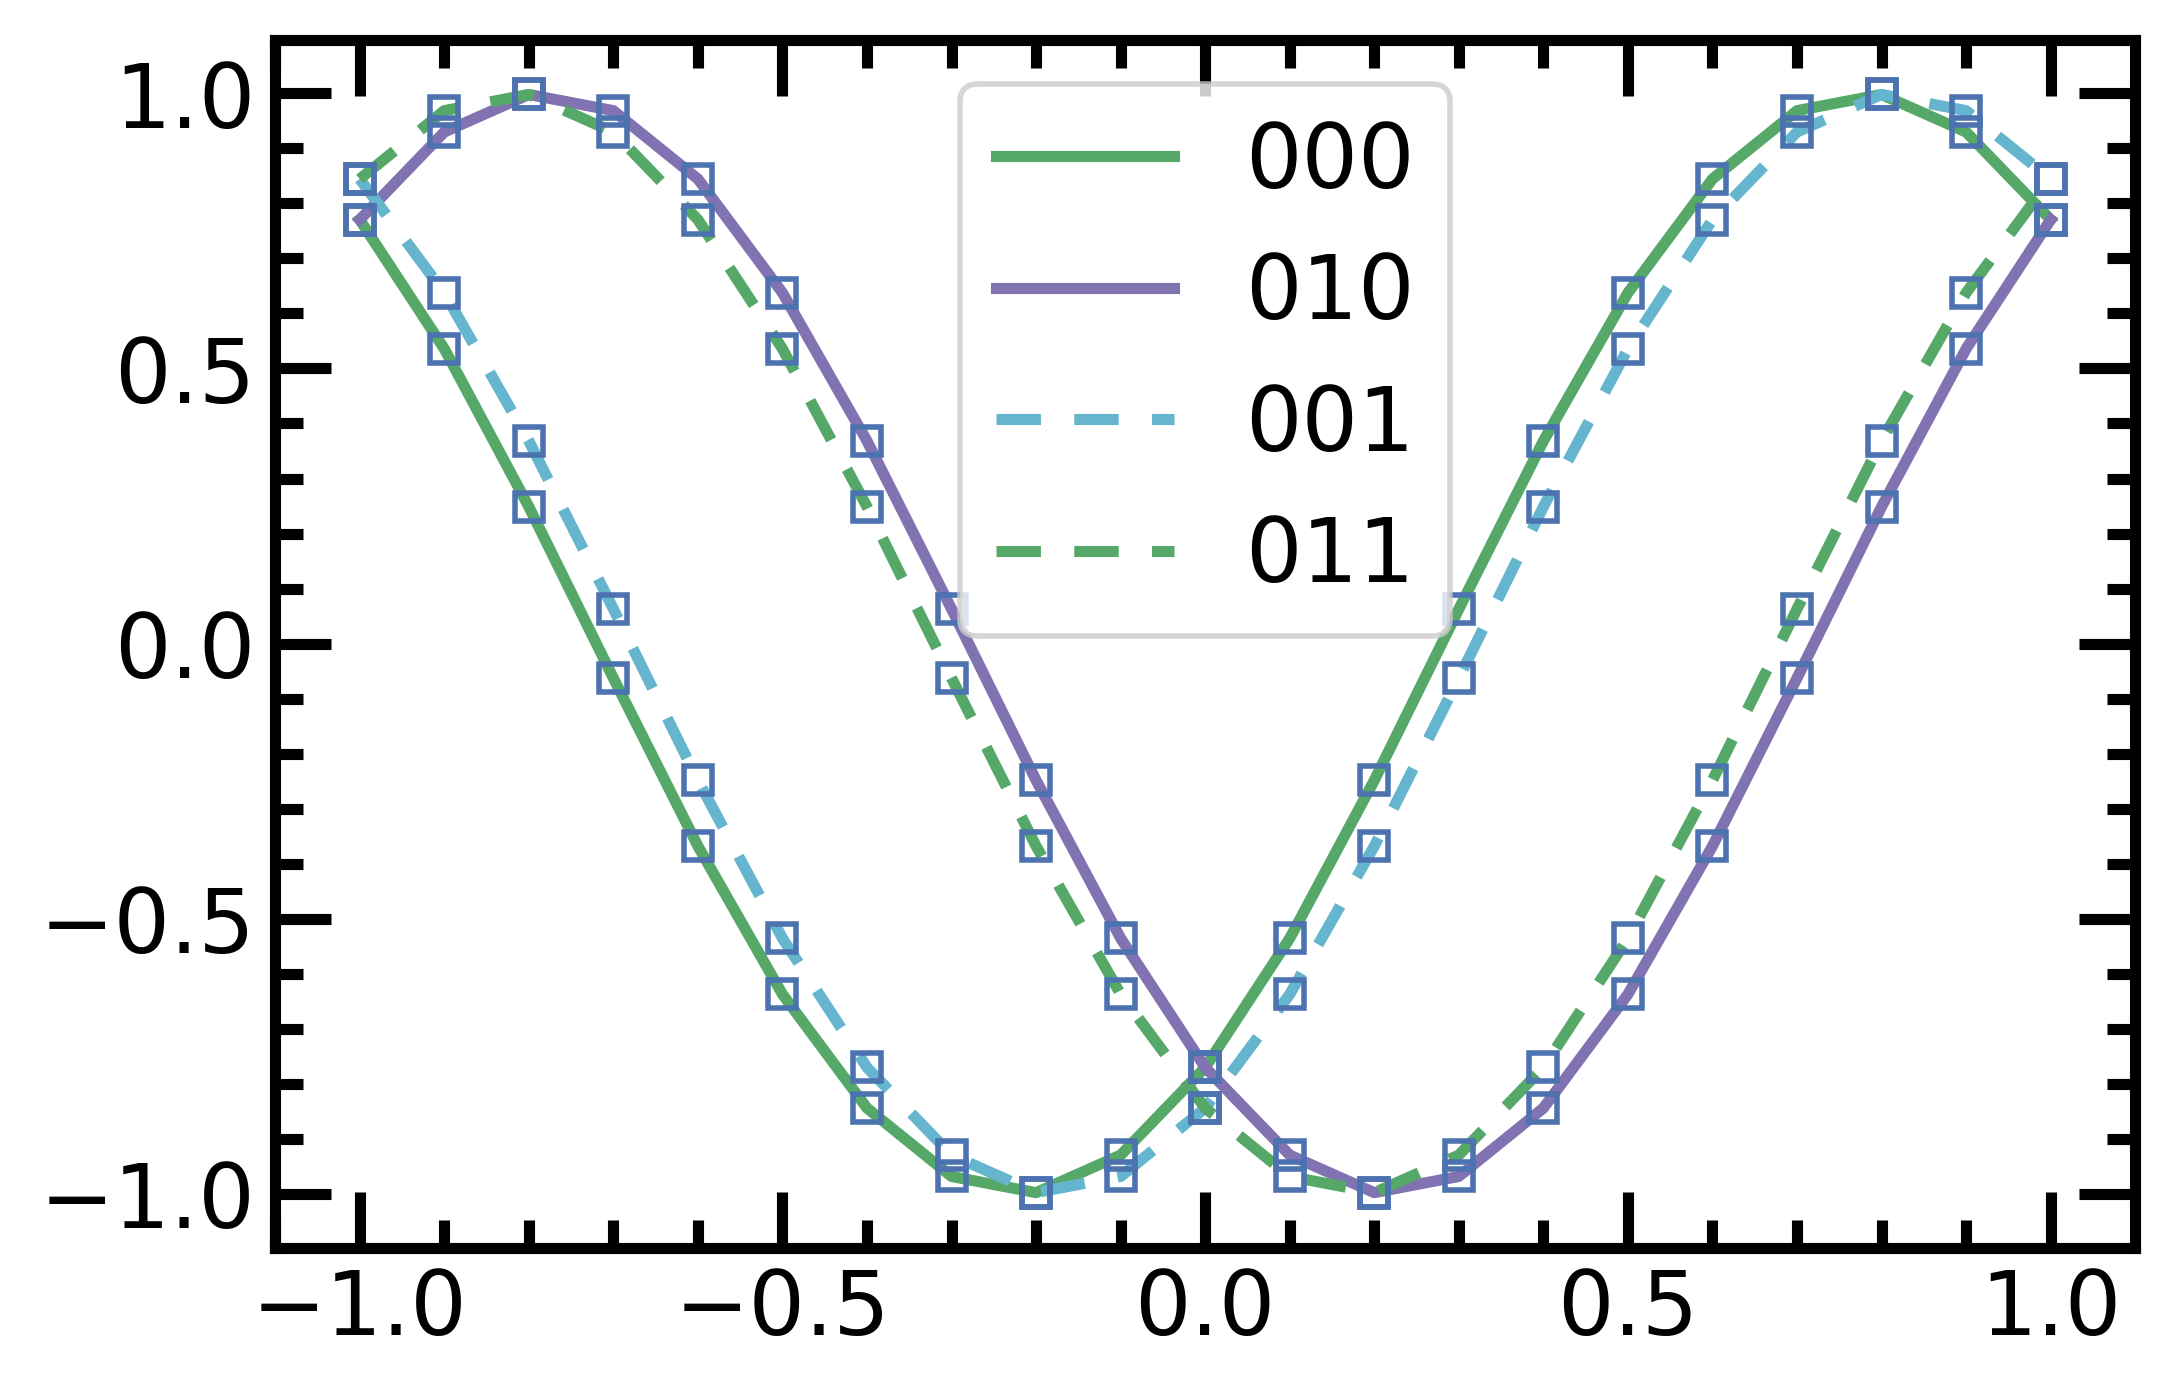

In [33]:
#Measure first qubit
ini_state = eig_vec[0] #000
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='000')
phase_000_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[2] #010
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '-', label ='010')
phase_010_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[3] #001
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.2, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='001')
phase_001_q0 = opt[2]/(2*np.pi)

ini_state = eig_vec[6] #011
state_1 = tensor(ry(np.pi/2),qeye(2),qeye(2))*ini_state
for p_idx, phi in enumerate (phi_sweep):
    state_2 = mesolve(h, state_1, t_list).states
    state_3 = tensor(rx(np.pi), rx(np.pi), qeye(2))*state_2[-1]
    state_4 = mesolve(h, state_3, t_list).states
    state_5 = tensor(ry(np.pi/2)*rz(phi),qeye(2),qeye(2))*state_4[-1]
    meas_result[p_idx] = expect(tensor(sigmaz(),qeye(2), qeye(2)),state_5)
plt.errorbar(phi_sweep/np.pi,meas_result, fmt='s', mfc='none', mew=1.0, mec='C0', ms = 5.0)
opt,cov = curve_fit(cos_fit, ydata = meas_result, xdata = phi_sweep, p0 = [-1, 0.2, 0.5, 0], xtol = 1e-10)
plt.plot(phi_sweep/np.pi, cos_fit(phi_sweep, *opt), linewidth= 2.0,  linestyle = '--', label ='011')
phase_011_q0 = opt[2]/(2*np.pi)
plt.legend()

zzi_rate = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
zzi_rate = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate),' GHz')
ziz_rate = abs(phase_000_q0 - phase_001_q0)/T_gate/2
print ('ZIZ rate = ',str(ziz_rate),' GHz')
ziz_rate = abs(phase_010_q0 - phase_011_q0)/T_gate/2


print ('ZIZ rate = ',str(ziz_rate),' GHz')

In [35]:
zzi_rate_0 = abs(phase_000_q0 - phase_010_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate_0),' GHz')
zzi_rate_1 = abs(phase_001_q0 - phase_011_q0)/T_gate/2
print ('ZZI rate = ',str(zzi_rate_1),' GHz')
zzz_rate = abs(zzi_rate_1 - zzi_rate_0)/2
print ('ZZZ rate = ',str(zzz_rate),' GHz')

ZZI rate =  0.022002590646098857  GHz
ZZI rate =  0.017997457810243884  GHz
ZZZ rate =  0.002002566417927487  GHz
